# Lead Scoring Case Study

## <strong><span style="color:red">Step 1: Importing Libraries and Data</span></strong>

### 1.1 Import Libraries, Suppress Warnings and Set Display

In [73]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Import Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics, linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score

# Import statsmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [2]:
# Environment settings
import pandas as pd

pd.set_option("display.max_columns", None)  # Display all columns
pd.set_option("display.max_rows", None)     # Display all rows
pd.set_option('display.width', None)        # Remove width limit for column display
pd.set_option('display.float_format', lambda x: '%.4f' % x)

###  1.2 Reading the Data

In [3]:
#Data Set Retrieval
df_leads = pd.read_csv("Leads.csv")

In [4]:
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0       0.0000   
1  Organic Search           No          No          0       5.0000   
2  Direct Traffic           No          No          1       2.0000   
3  Direct Traffic           No          No          0       1.0000   
4          Google           No          No          1       2.0000   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                0.0000  Page Visited on Website   
1                          674                2.5000             Email Opened   
2                         1532                2.0000             Email Opened   
3                          305                1.0000              Unreachable   
4                         1428                1.0000        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
df_leads.shape

(9240, 37)

<strong><span style="color:red">Important Note:</span></strong> The original dataframe contains 9240 rows and 37 columns.

## <strong><span style="color:red">Step 2: Analyzing and Examining the Data</span></strong>

In [6]:
#Examine the summary statistics of all numerical columns to gain a better understanding of the dataset's distribution and identify any anomalies.
df_leads.describe()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count    9240.0000  9240.0000    9103.0000                    9240.0000   
mean   617188.4356     0.3854       3.4452                     487.6983   
std     23405.9957     0.4867       4.8549                     548.0215   
min    579533.0000     0.0000       0.0000                       0.0000   
25%    596484.5000     0.0000       1.0000                      12.0000   
50%    615479.0000     0.0000       3.0000                     248.0000   
75%    637387.2500     1.0000       5.0000                     936.0000   
max    660737.0000     1.0000     251.0000                    2272.0000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count             9103.0000                    5022.0000   
mean                 2.3628                      14.3063   
std                  2.1614                       1.3867   
min                  0.0000                       7.0000   
25%                  1.0000                      14.0000   
50%                  2.0000                      14.0000   
75%                  3.0000                      15.0000   
max                 55.0000                      18.0000   

       Asymmetrique Profile Score  
count                   5022.0000  
mean                      16.3449  
std                        1.8114  
min                       11.0000  
25%                       15.0000  
50%                       16.0000  
75%                       18.0000  
max                       20.0000

In [7]:
#Determining the count of unique values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# Verify column data types and the presence of null values
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# Assessing the count of missing values in each column
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           


<strong><span style="color:red">Important Note:</span></strong> Some columns in the dataframe contain a significant number of missing or null values. Decisions regarding how to handle these missing values will be made during the data cleaning and imputation phase.

In [10]:
# Examine duplicate rows in the dataset
print(df_leads.duplicated().sum())

0



<strong><span style="color:red">Important Note:</span></strong> The dataframe "df_leads" does not contain any duplicate rows.

## <strong><span style="color:red">Step 3: Data Cleansing</span></strong>

### 3.1 Handling 'Select' Value Entries


As indicated in the Problem Statement, numerous categorical variables contain a category labeled 'Select', and it requires special treatment because it essentially functions as a null value. This might be due to the fact that the customer did not make a selection from the list, resulting in the default 'Select' value for these columns.

In [11]:
# Identifying columns with the value 'Select'

columns_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique()) > 1]
print(columns_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [12]:
# Replacing 'Select' values with NaN
df_leads = df_leads.replace('Select', np.nan)

In [13]:
# Verify if all 'Select' values have been resolved in the columns
remaining_select_columns = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique()) > 1]
print(remaining_select_columns)

[]


<strong><span style="color:red">Important Note:</span></strong> At this point, there are no more 'Select' values present in the dataframe df_leads.

###  3.2 Dealing with Missing Values

In [14]:
# Computing the Percentage of Missing Values
100*(df_leads.isna().mean()).sort_values(ascending=False)

How did you hear about X Education              78.4632
Lead Profile                                    74.1883
Lead Quality                                    51.5909
Asymmetrique Profile Score                      45.6494
Asymmetrique Activity Score                     45.6494
Asymmetrique Activity Index                     45.6494
Asymmetrique Profile Index                      45.6494
City                                            39.7078
Specialization                                  36.5801
Tags                                            36.2879
What matters most to you in choosing a course   29.3182
What is your current occupation                 29.1126
Country                                         26.6342
Page Views Per Visit                             1.4827
TotalVisits                                      1.4827
Last Activity                                    1.1147
Lead Source                                      0.3896
Receive More Updates About Our Courses          

### 3.2.1 Eliminate Columns with Over 40% Null Values

In [15]:
# Function to drop columns with a specified percentage of missing values and display shape changes
def dropNullColumns(data, percentage=40):
    
    # Calculate the percentage of missing values in each column and sort them
    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    
    # Identify columns with missing values exceeding or equal to the specified percentage
    col_to_drop = missing_perc[missing_perc >= percentage].index.to_list()
    
    # Print the number of dropped columns and the list of columns dropped
    print("Total columns dropped: ", len(col_to_drop), "\n")
    print("List of columns dropped: ", col_to_drop, "\n")
    
    # Display the shape of the dataframe before and after dropping columns
    print("Shape before dropping columns: ", data.shape)
    
    # Drop the identified columns
    data.drop(labels=col_to_drop, axis=1, inplace=True)
    
    # Display the updated shape of the dataframe
    print("Shape after dropping columns: ", data.shape)

# Dropping columns using the user-defined function:
dropNullColumns(df_leads)

Total columns dropped:  7 

List of columns dropped:  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [16]:
# Determine the percentage of missing values in the remaining columns and sort them in descending order: 
100*(df_leads.isna().mean()).sort_values(ascending=False)

City                                            39.7078
Specialization                                  36.5801
Tags                                            36.2879
What matters most to you in choosing a course   29.3182
What is your current occupation                 29.1126
Country                                         26.6342
Page Views Per Visit                             1.4827
TotalVisits                                      1.4827
Last Activity                                    1.1147
Lead Source                                      0.3896
Through Recommendations                          0.0000
Receive More Updates About Our Courses           0.0000
Prospect ID                                      0.0000
Newspaper                                        0.0000
Update me on Supply Chain Content                0.0000
Get updates on DM Content                        0.0000
I agree to pay the amount through cheque         0.0000
A free copy of Mastering The Interview          

### 3.2.2 Handling Columns with Categorical Data

In [17]:
#Identify columns with non-numeric data type
categorical_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


<strong><span style="color:red">Important Note:</span></strong> The approach involves examining the count of values in each categorical column to determine the appropriate treatment for missing values in that specific column.

In [18]:
columnsList = ["City", "Specialization", "Tags", 'What matters most to you in choosing a course',
              'What is your current occupation', 'Country', 'Last Activity', 'Lead Source']

for column in columnsList:
    value_counts_percentage = 100 * df_leads[column].value_counts(normalize=True)
    print("Value Counts % for:", column, "\n")
    print(value_counts_percentage, "\n")
    print("___" * 40, "\n")

Value Counts % for: City 

Mumbai                        57.8352
Thane & Outskirts             13.4985
Other Cities                  12.3138
Other Cities of Maharashtra    8.2032
Other Metro Cities             6.8210
Tier II Cities                 1.3283
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

Value Counts % for: Specialization 

Finance Management                  16.6553
Human Resource Management           14.4710
Marketing Management                14.3003
Operations Management                8.5836
Business Administration              6.8771
IT Projects Management               6.2457
Supply Chain Management              5.9556
Banking, Investment And Insurance    5.7679
Travel and Tourism                   3.4642
Media and Advertising                3.4642
International Business               3.0375
Healthcare Management                2.7133
Hospitality Management      

### Insights:

<strong><span style="color:red">City:</span></strong> The 'City' column has 39.71% missing values. Imputing missing values with 'Mumbai' would introduce skewness in the data, potentially leading to bias in the model. Therefore, it is advisable to drop the 'City' column.

<strong><span style="color:red">Specialization:</span></strong> 'Specialization' exhibits 36.58% missing values. Since the distribution of specializations is fairly even, imputation or dropping is not the best choice. Instead, a new category labeled 'Others' should be created.

<strong><span style="color:red">Tags:</span></strong> 'Tags' has 36.29% missing values. It represents the current status of the leads, but due to the high number of missing values, it will not be useful for modeling. Thus, it can be dropped.

<strong><span style="color:red">What matters most to you in choosing a course:</span></strong> This variable has 29.32% missing values, with 99.95% of customers selecting 'better career prospects'. It is highly skewed and unlikely to provide meaningful insights.

<strong><span style="color:red">What is your current occupation:</span></strong> Missing values can be imputed with 'Unemployed', which is the most common value. From a business perspective, this variable is important, as X Education offers online courses, and unemployed individuals may enroll to enhance their employability.

<strong><span style="color:red">Country:</span></strong> Approximately 96% of customers are from India, and imputing missing values with 'India' would not add significant value. Therefore, it is reasonable to drop the 'Country' column.

<strong><span style="color:red">Last Activity:</span></strong> "Email Opened" is the most frequent value, and the overall missing values in this column are just 1.11%. Therefore, missing values can be imputed with the label 'Email Opened'.

<strong><span style="color:red">Lead Source:</span></strong> "Google" is the most common lead source, and the overall nulls in this column account for just 0.39%. Therefore, missing values can be imputed with the label 'Google'.


### Dropping the following columns:

- 'City'
- 'Tags'
- 'Country'
- 'What matters most to you in choosing a course'

In [19]:
# Eliminating Columns
print("Before Drop", df_leads.shape)
df_leads.drop(['City', 'Tags', 'Country', 'What matters most to you in choosing a course'], axis=1, inplace=True)
print("After Drop", df_leads.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


In [20]:
# Imputing values based on the provided insights
missing_values = {
    'Specialization': 'Others',
    'Lead Source': 'Google',
    'Last Activity': 'Email Opened',
    'What is your current occupation': 'Unemployed'
}

df_leads = df_leads.fillna(value=missing_values)


In [21]:
# Reevaluating the Percentage of Null Values in the Remaining Columns
round(((df_leads.isnull().sum() / df_leads.shape[0]) * 100), 2).sort_values(ascending=False)

TotalVisits                                1.4800
Page Views Per Visit                       1.4800
Prospect ID                                0.0000
Magazine                                   0.0000
A free copy of Mastering The Interview     0.0000
I agree to pay the amount through cheque   0.0000
Get updates on DM Content                  0.0000
Update me on Supply Chain Content          0.0000
Receive More Updates About Our Courses     0.0000
Through Recommendations                    0.0000
Digital Advertisement                      0.0000
Newspaper                                  0.0000
X Education Forums                         0.0000
Newspaper Article                          0.0000
Search                                     0.0000
Lead Number                                0.0000
What is your current occupation            0.0000
Specialization                             0.0000
Last Activity                              0.0000
Total Time Spent on Website                0.0000


### 3.2.3 Handling Columns with Numerical Data

In [22]:
#Print the top 10 value counts for the 'TotalVisits' column:
print("TotalVisits - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


0.0000    2189
2.0000    1680
3.0000    1306
4.0000    1120
5.0000     783
6.0000     466
1.0000     395
7.0000     309
8.0000     224
9.0000     164
Name: TotalVisits, dtype: int64


<strong><span style="color:red">Important Note:</span></strong> Missing values in the 'TotalVisits' column can be imputed with the mode.

In [23]:
# Imputing 'TotalVisits' Missing Values with Mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)

In [24]:
# Print the top 10 value counts for the 'Page Views Per Visit' column:
print("Page Views Per Visit - Value Counts")
print("----------------------------------------")
df_leads['Page Views Per Visit'].value_counts().head(10)

Page Views Per Visit - Value Counts
----------------------------------------


0.0000    2189
2.0000    1795
3.0000    1196
4.0000     896
1.0000     651
5.0000     517
1.5000     306
6.0000     244
2.5000     241
7.0000     133
Name: Page Views Per Visit, dtype: int64

<strong><span style="color:red">Important Note:</span></strong> Addressing missing values in 'Page Views Per Visit' by imputing with the mode.


In [25]:
# Imputing missing values in 'Page Views Per Visit' with its mode.
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

### Re-assessing the null values for columns.

In [26]:
# Verifying the Percentage of Null Values After Handling Categorical and Numerical Columns
round(((df_leads.isnull().sum() / df_leads.shape[0]) * 100), 2).sort_values(ascending=False)

Prospect ID                                0.0000
Lead Number                                0.0000
A free copy of Mastering The Interview     0.0000
I agree to pay the amount through cheque   0.0000
Get updates on DM Content                  0.0000
Update me on Supply Chain Content          0.0000
Receive More Updates About Our Courses     0.0000
Through Recommendations                    0.0000
Digital Advertisement                      0.0000
Newspaper                                  0.0000
X Education Forums                         0.0000
Newspaper Article                          0.0000
Magazine                                   0.0000
Search                                     0.0000
What is your current occupation            0.0000
Specialization                             0.0000
Last Activity                              0.0000
Page Views Per Visit                       0.0000
Total Time Spent on Website                0.0000
TotalVisits                                0.0000


### 3.3 Removing Unnecessary Columns

In [27]:
# Last Notable Activity - Percentage of Values
print("Last Notable Activity")
print("----------------------------------------")
100 * df_leads['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
----------------------------------------


Modified                       36.8723
Email Opened                   30.5952
SMS Sent                       23.5065
Page Visited on Website         3.4416
Olark Chat Conversation         1.9805
Email Link Clicked              1.8723
Email Bounced                   0.6494
Unsubscribed                    0.5087
Unreachable                     0.3463
Had a Phone Conversation        0.1515
Email Marked Spam               0.0216
Approached upfront              0.0108
Resubscribed to emails          0.0108
View in browser link Clicked    0.0108
Form Submitted on Website       0.0108
Email Received                  0.0108
Name: Last Notable Activity, dtype: float64

### 3.3.1 Managing Columns with a Sole Unique Value

In [28]:
# Inspect columns with only one unique value, where count and frequency are identical.
df_leads.describe(include='object')

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Specialization  \
count         9240         9240        9240          9240           9240   
unique          21            2           2            17             19   
top         Google           No          No  Email Opened         Others   
freq          2904         8506        9238          3540           3380   

       What is your current occupation Search Magazine Newspaper Article  \
count                             9240   9240     9240              9240   
unique                               6      2        1                 2   
top                         Unemployed     No       No                No   
freq                              8290   9226     9240              9238   

       X Education Forums Newspaper Digital Advertisement  \
count                9240      9240                  9240   
unique                  2         2                     2   
top                    No        No                    No   
freq                 9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque  \
count                                      9240   
unique                                        1   
top                                          No   
freq                                       9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407

<strong><span style="color:red">Important Note:</span></strong> The following columns contain only one unique value and are of no use as they have only one category of response from customers. Therefore, these columns can be safely <strong><span style="color:red">dropped</span></strong>:

- 'I agree to pay the amount through cheque'
- 'Get updates on DM Content'
- 'Update me on Supply Chain Content'
- 'Receive More Updates About Our Courses'
- 'Magazine'

In [29]:
# List of columns with one unique value whose count and frequency are the same; these columns will be dropped
cols_to_drop = ['Magazine', 'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque']

print("Before Dropping Columns", df_leads.shape)
df_leads.drop(cols_to_drop, axis=1, inplace=True)
print("After Dropping Columns", df_leads.shape)


Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


### 3.3.2 Eliminating Columns Not Beneficial for Modeling

<strong><span style="color:red">Important Note:</span></strong> The following columns do not contribute any meaningful information to the model. Removing these columns will streamline the dataframe by eliminating unnecessary data.

- 'Prospect ID',
- 'Lead Number',
- 'Last Notable Activity'

In [30]:
# Removing Columns
print("Before Dropping Columns", df_leads.shape)
df_leads.drop(['Prospect ID', 'Lead Number', 'Last Notable Activity'], axis=1, inplace=True)
print("After Dropping Columns", df_leads.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


In [31]:
# Obtaining the Percentage of Missing Values in Each Row
100*(df_leads.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0      0.0000
6064   0.0000
6156   0.0000
6157   0.0000
6158   0.0000
6159   0.0000
6160   0.0000
6161   0.0000
6162   0.0000
6163   0.0000
dtype: float64

### 3.4 Inspecting and Eliminating Skewed Categorical Columns
<strong><span style="color:red">Important Note:</span></strong> This process is analogous to addressing unique values in numerical columns.

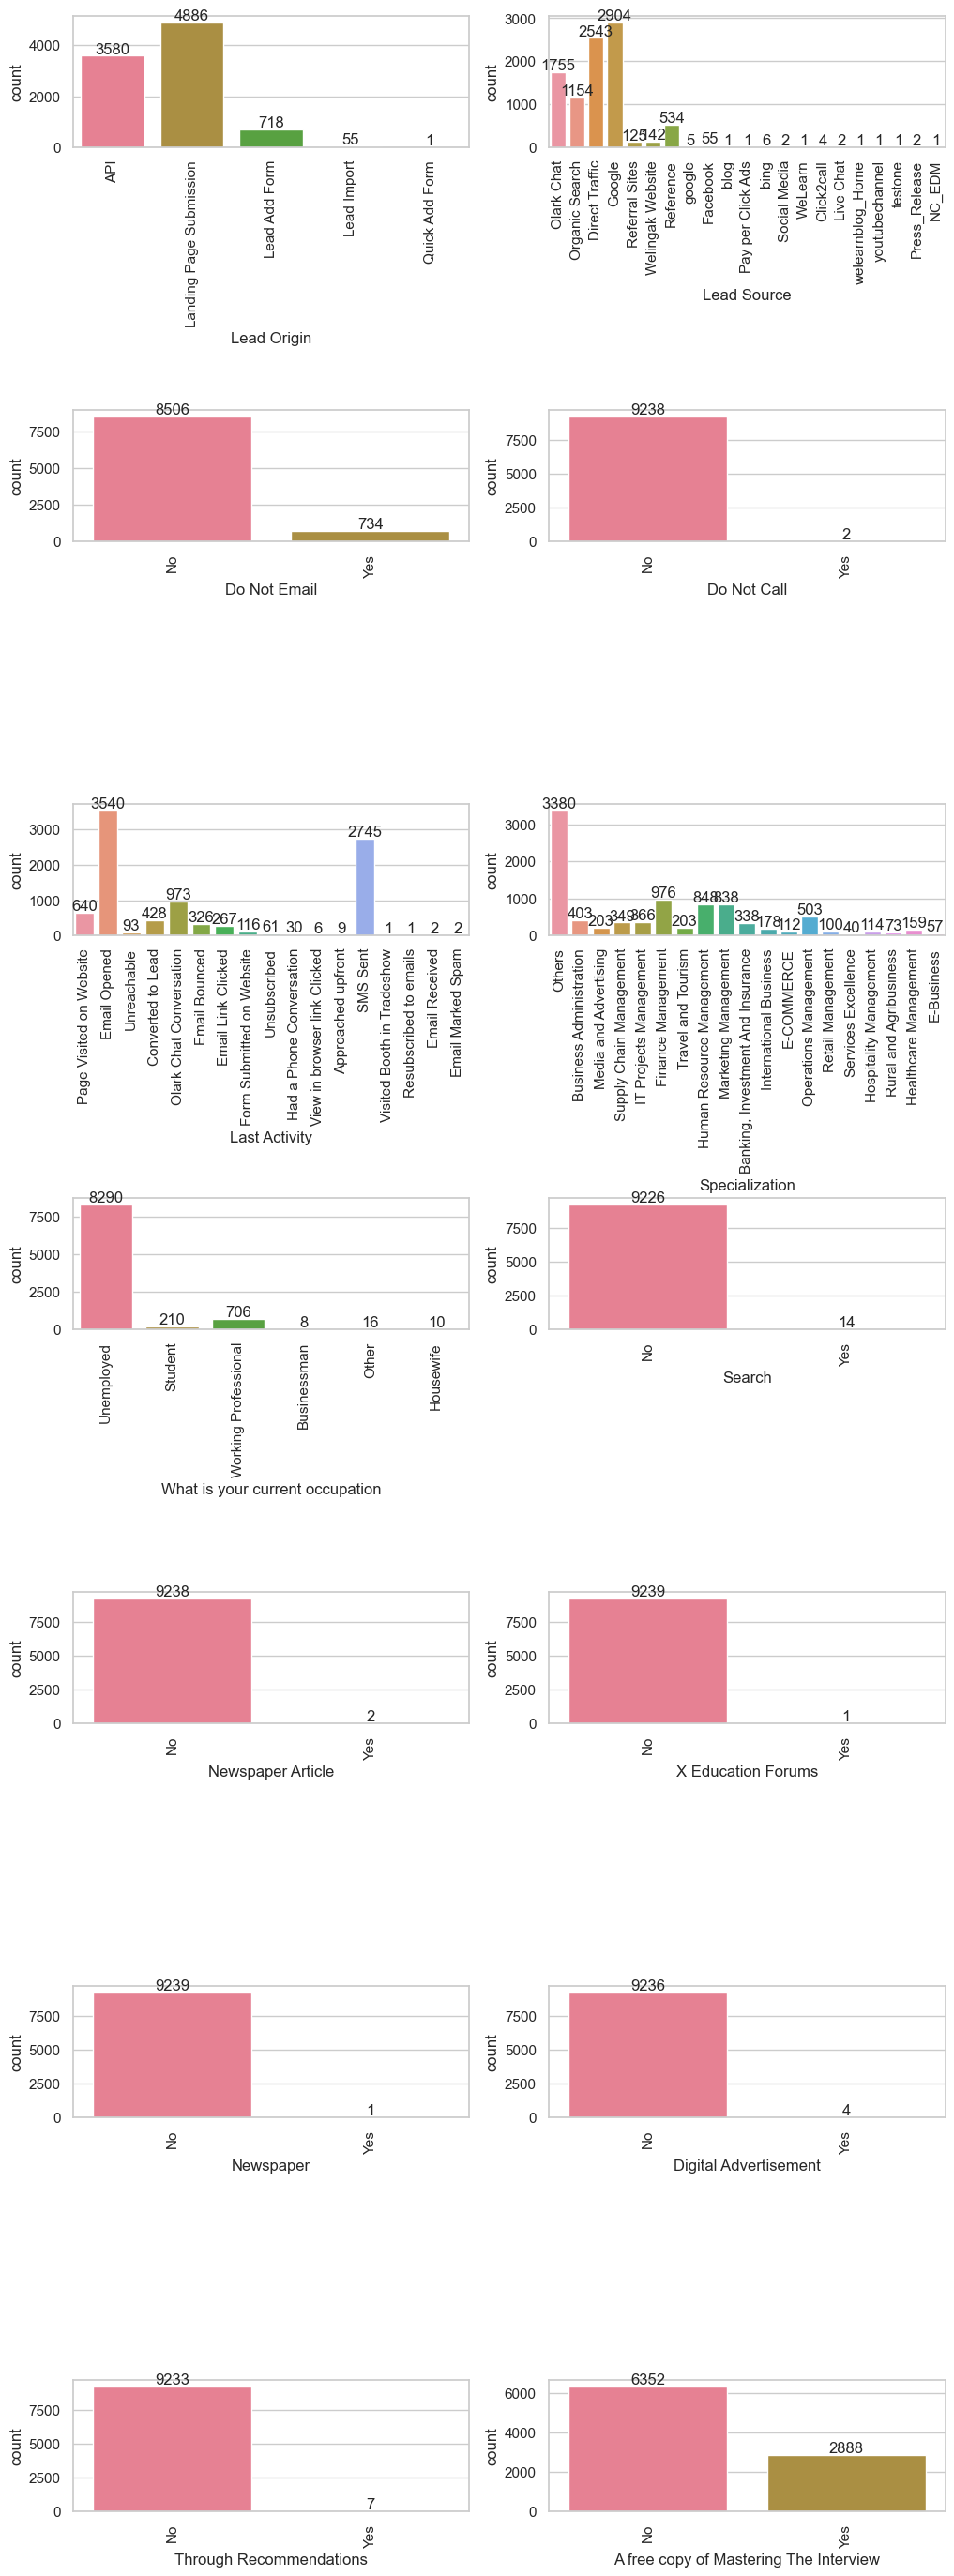

In [32]:
# Set the style and color palette
sns.set(style="whitegrid")
sns.set_palette("husl")

# Define the categorical columns
categorical_columns = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()

# Plotting countplot for object dtype to visualize data distribution
plt.figure(figsize=(12, 40))
plt.subplots_adjust(wspace=0.2, hspace=2)
for i, col in enumerate(categorical_columns):
    plt.subplot(8, 2, i + 1)
    ax = sns.countplot(x=col, data=df_leads) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


<strong><span style="color:red">Important Note:</span></strong> The following columns have data that is highly skewed:

- 'Do Not Call'
- 'Search'
- 'Newspaper Article'
- 'X Education Forums'
- 'Newspaper'
- 'Digital Advertisement'
- 'Through Recommendations'

Due to the high skewness and the potential impact on the performance of logistic regression models, these columns will be dropped. Skewed variables can result in biased or inaccurate parameter estimates in the model.

In [33]:
# Eliminating Categorical Columns with Highly Skewed Data
print("Before Drop: ", df_leads.shape)
df_leads.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'], axis=1, inplace=True)
print("After Drop: ", df_leads.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [34]:
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0       0.0000                            0                0.0000   
1       5.0000                          674                2.5000   
2       2.0000                         1532                2.0000   
3       1.0000                          305                1.0000   
4       2.0000                         1428                1.0000   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

### Data is Now Free of Missing Values
After successfully cleaning the data and addressing missing values, the next step is to standardize the values.

### 3.5 Analyzing Outliers

In [35]:
#Numerical 
def Check_Outliers(data, columnList):
    plt.figure(figsize=[22, 11])
    plt.subplots_adjust(wspace=0.4, hspace=0.5)

    for i, j in enumerate(columnList):
        plt.subplot(2, 2, i + 1)
        sns.boxplot(y=data[j])
        plt.title(j, fontsize=15, color='red')  # Move this line inside the loop

    plt.suptitle("\nChecking Outliers using Boxplot", fontsize=20, color="red")
    plt.ylabel(None)

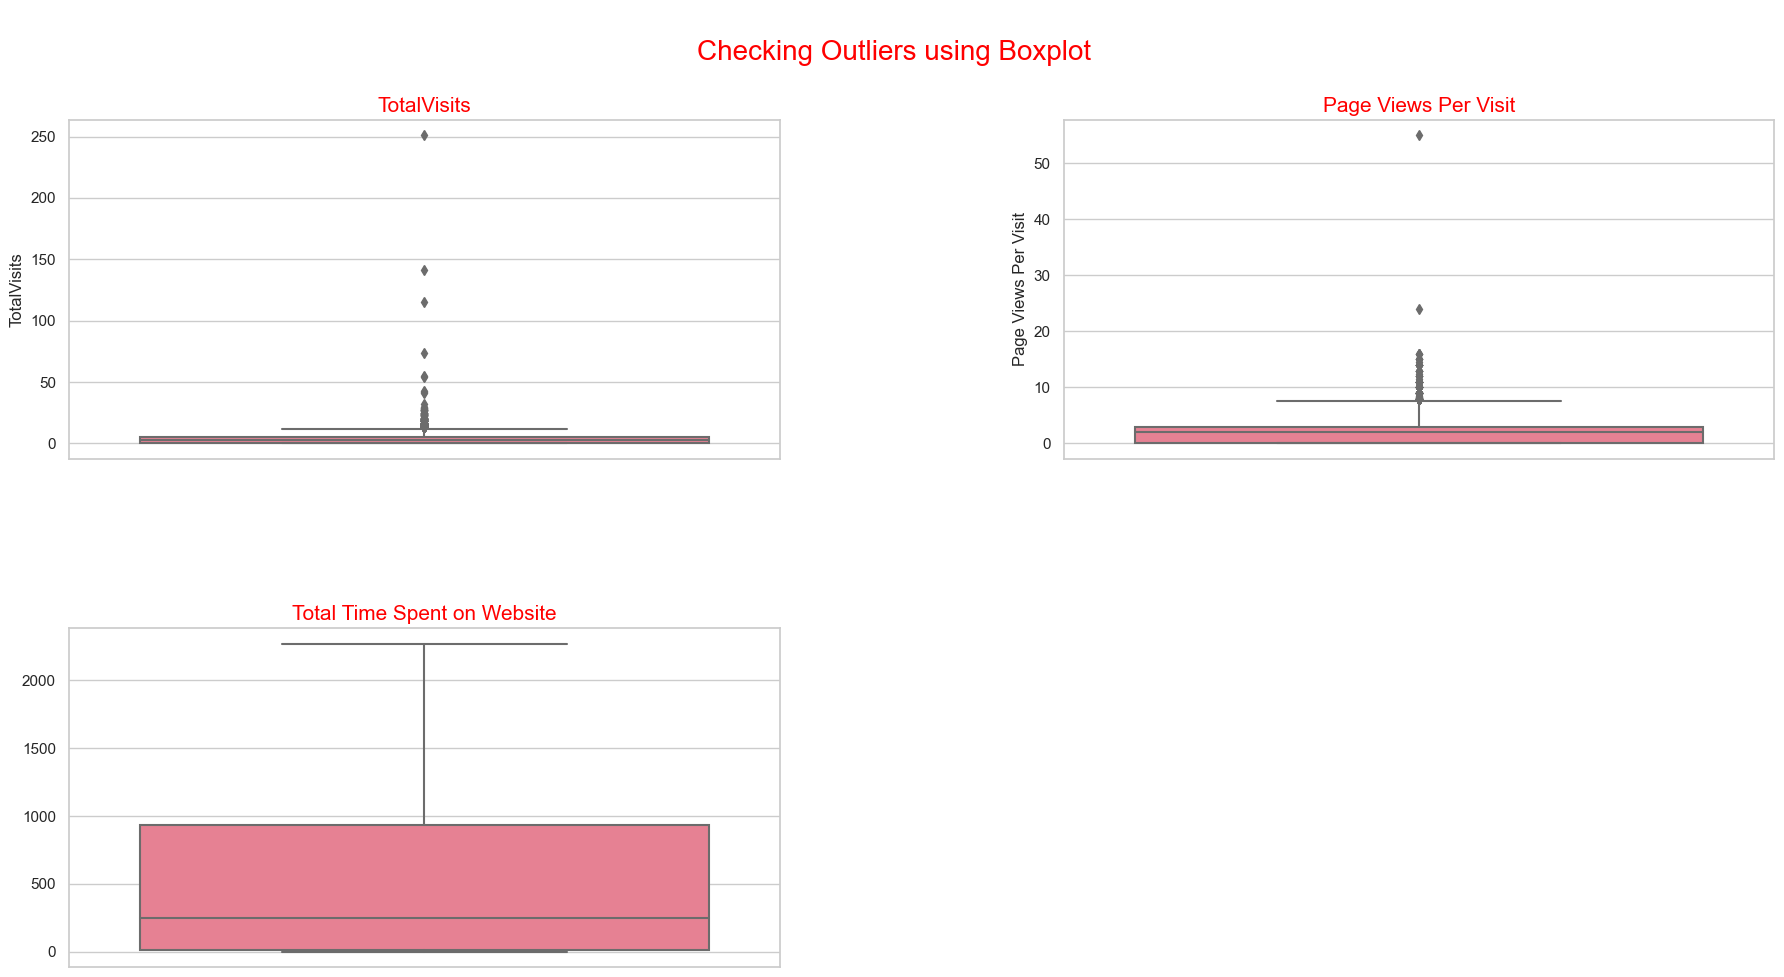

In [36]:
# Checking outliers for numerical variables other than the target variable
num_cols = ["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]

# Using the custom function
Check_Outliers(df_leads, num_cols)



"TotalVisits" and "Page Views Per Visit" both exhibit outliers, as evident in the boxplot visualizations. To address these outliers, appropriate treatment is needed for these variables.

### Limiting Outliers through Capping Treatment

In [37]:
# Summary statistics before outlier treatment
df_leads.describe(percentiles=[.10, .25, .50, .75, .95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.0000    9240.0000                    9240.0000   
mean      0.3854       3.3942                     487.6983   
std       0.4867       4.8367                     548.0215   
min       0.0000       0.0000                       0.0000   
10%       0.0000       0.0000                       0.0000   
25%       0.0000       0.0000                      12.0000   
50%       0.0000       3.0000                     248.0000   
75%       1.0000       5.0000                     936.0000   
95%       1.0000      10.0000                    1562.0000   
max       1.0000     251.0000                    2272.0000   

       Page Views Per Visit  
count             9240.0000  
mean                 2.3278  
std                  2.1643  
min                  0.0000  
10%                  0.0000  
25%                  0.0000  
50%                  2.0000  
75%                  3.0000  
95%                  6.0000  
max                 55.0000

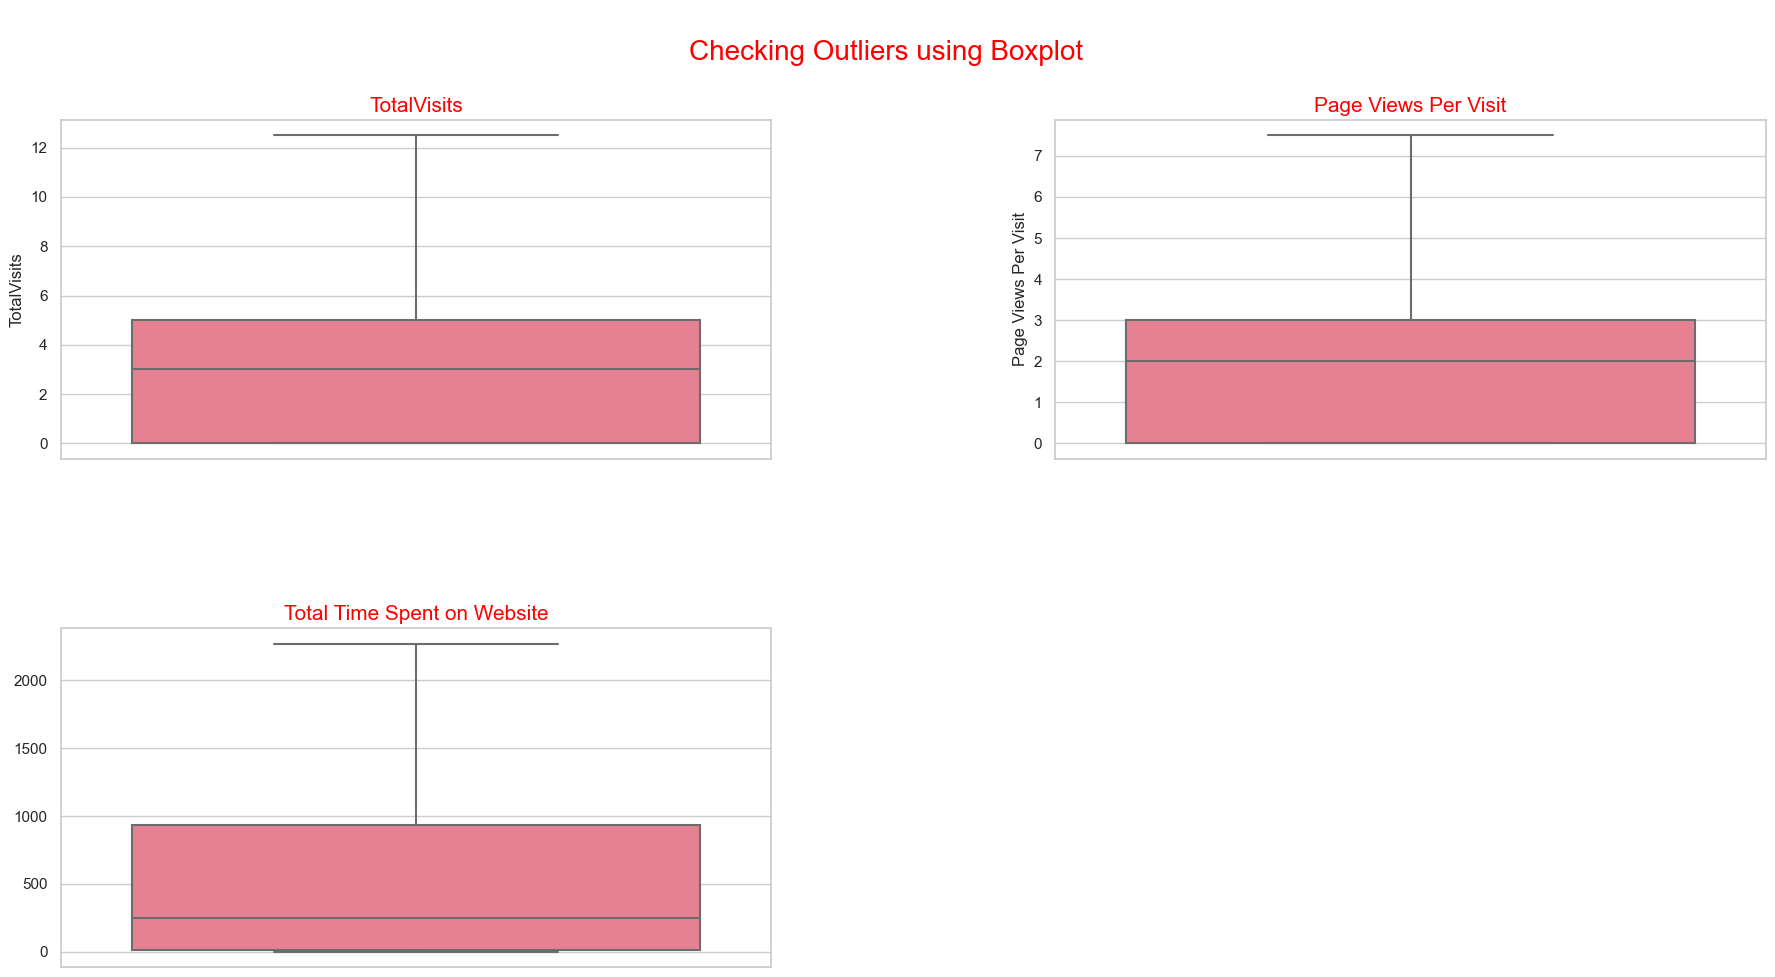

In [38]:
def Outlier_treatment(df, columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5 * IQR
        lower_bound = q1 - 1.5 * IQR

        # Capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])

        # Flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])

# Checking outliers for numerical variables other than the target variable
capping_cols = ["TotalVisits", "Page Views Per Visit"]

# Using the custom function for outlier treatment
Outlier_treatment(df_leads, capping_cols)

# Checking boxplot after outlier treatment
num_cols = ["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]

# Using the custom function to check for outliers
Check_Outliers(df_leads, num_cols)

In [39]:
# Summary statistics after outlier treatment with detailed percentile values
df_leads.describe(percentiles=[.10, .25, .50, .75, .95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.0000    9240.0000                    9240.0000   
mean      0.3854       3.2139                     487.6983   
std       0.4867       3.0051                     548.0215   
min       0.0000       0.0000                       0.0000   
10%       0.0000       0.0000                       0.0000   
25%       0.0000       0.0000                      12.0000   
50%       0.0000       3.0000                     248.0000   
75%       1.0000       5.0000                     936.0000   
95%       1.0000      10.0000                    1562.0000   
max       1.0000      12.5000                    2272.0000   

       Page Views Per Visit  
count             9240.0000  
mean                 2.2750  
std                  1.9178  
min                  0.0000  
10%                  0.0000  
25%                  0.0000  
50%                  2.0000  
75%                  3.0000  
95%                  6.0000  
max                  7.5000

### 3.6 Correcting Invalid Values and Standardizing Data in Columns
This step involves the following:

- Verifying if entries in the data are in the correct format.
- Standardizing casing styles (UPPER, lower).
- Reviewing and ensuring the correct data types for columns.

In [40]:
#Categorical
columnsList_cat = ["Lead Origin", "Lead Source", "Do Not Email", "Last Activity", "Specialization",
                  "What is your current occupation", "A free copy of Mastering The Interview"]

for i in columnsList_cat:
    perc = 100 * df_leads[i].value_counts(normalize=True)
    print("Value Counts % for:", i, "\n")
    print(perc, "\n")
    print("_^_" * 40, "\n")


Value Counts % for: Lead Origin 

Landing Page Submission   52.8788
API                       38.7446
Lead Add Form              7.7706
Lead Import                0.5952
Quick Add Form             0.0108
Name: Lead Origin, dtype: float64 

_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_ 

Value Counts % for: Lead Source 

Google              31.4286
Direct Traffic      27.5216
Olark Chat          18.9935
Organic Search      12.4892
Reference            5.7792
Welingak Website     1.5368
Referral Sites       1.3528
Facebook             0.5952
bing                 0.0649
google               0.0541
Click2call           0.0433
Press_Release        0.0216
Social Media         0.0216
Live Chat            0.0216
youtubechannel       0.0108
testone              0.0108
Pay per Click Ads    0.0108
welearnblog_Home     0.0108
WeLearn              0.0108
blog                 0.0108
NC_EDM               0.0108
Name: Lead Sour

<strong><span style="color:red">Important Note:</span></strong> 

Some categories/levels in the "Lead Score" and "Last Activity" columns have very few records. To prevent having too many unnecessary columns when creating dummy variables, it's recommended to group these categories together under "Others."

In the "Lead Source" column, "Google" and "google" should be treated as the same category, so we will standardize the case to ensure consistency.

#### 3.6.1 Grouping Low frequency values

In [41]:
# Grouping low-frequency value levels to "Others" in the "Lead Source" column
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing", "Click2call", "Press_Release", "Social Media", "Live Chat", "youtubechannel",
                                                           "testone", "Pay per Click Ads", "welearnblog_Home", "WeLearn", "blog", "NC_EDM"], "Others")

# Standardizing "google" to "Google" in the "Lead Source" column
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google", "Google")


In [42]:
# Displaying the value counts percentage after the replacements
df_leads["Lead Source"].value_counts(normalize=True) * 100

Google             31.4827
Direct Traffic     27.5216
Olark Chat         18.9935
Organic Search     12.4892
Reference           5.7792
Welingak Website    1.5368
Referral Sites      1.3528
Facebook            0.5952
Others              0.2489
Name: Lead Source, dtype: float64

In [43]:
# Grouping low-frequency value levels to "Others" in the "Last Activity" column
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 
                                                           'Approached upfront', 'View in browser link Clicked',       
                                                           'Email Marked Spam', 'Email Received', 'Visited Booth in Tradeshow',
                                                           'Resubscribed to emails'], 'Others')

In [44]:
# Displaying the value counts percentage after the replacements in the "Last Activity" column
df_leads['Last Activity'].value_counts(normalize=True) * 100

Email Opened                38.3117
SMS Sent                    29.7078
Olark Chat Conversation     10.5303
Page Visited on Website      6.9264
Converted to Lead            4.6320
Email Bounced                3.5281
Email Link Clicked           2.8896
Others                       2.2186
Form Submitted on Website    1.2554
Name: Last Activity, dtype: float64

In [45]:
# Renaming the column name to "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming the column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)


<strong><span style="color:red">Important Note:</span></strong> 

Both "Do Not Email" and "Free_copy" are binary categorical columns. To standardize them, we will map "yes" to 1 and "no" to 0.

In [46]:
# Mapping binary categorical variables (Yes/No to 1/0)
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x == 'Yes' else 0)

df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x == 'Yes' else 0)

In [47]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


<strong><span style="color:red">Important Note:</span></strong>
The data types appear to be suitable, and no modifications are necessary.

## <strong><span style="color:red">Step 4: Data Analysis (EDA)</span></strong>


### 4.1 Checking for Data Imbalance
Data imbalance refers to an uneven distribution of observations in a dataset, where one value is present in the majority, and the other is in the minority. In this context, we are concerned with the imbalance in the target variable, which is "Converted." A value of 1 indicates that a past lead was converted, while a value of 0 means it wasn't converted. We will check for data imbalance in the target variable.

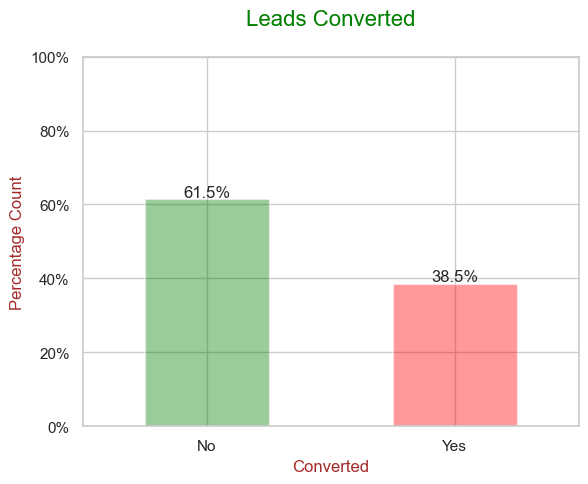

In [48]:
import matplotlib.pyplot as plt

# Plotting the results on a bar plot
ax = (100 * df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Green", "Red"], alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight': 12, 'color': 'Green'})

# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight': 20, 'color': 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight': 20, 'color': 'Brown'})

# Modifying y-axis ticks
ticks = np.arange(0, 101, 20)
labels = ["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks, labels)

# X-axis ticks
plt.xticks([0, 1], ["No", "Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


<strong><span style="color:red">Insights:</span></strong> 

- The conversion rate is 38.5%, indicating that only 38.5% of the people have converted to leads (minority).
- The majority, which is 61.5% of the people, did not convert to leads.

In [49]:
# Calculate the ratio of data imbalance
ratio = (df_leads["Converted"].value_counts(normalize=True).loc[0]) / (df_leads["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio: {:.2f} : 1".format(ratio))


Data Imbalance Ratio: 1.59 : 1


### 4.2 Univariate Analysis

In [50]:
#Catgorical 
# List of categorical columns
cat_cols = ["Lead Origin", "Current_occupation", "Do Not Email", "Free_copy", "Lead Source", "Last Activity", "Specialization"]

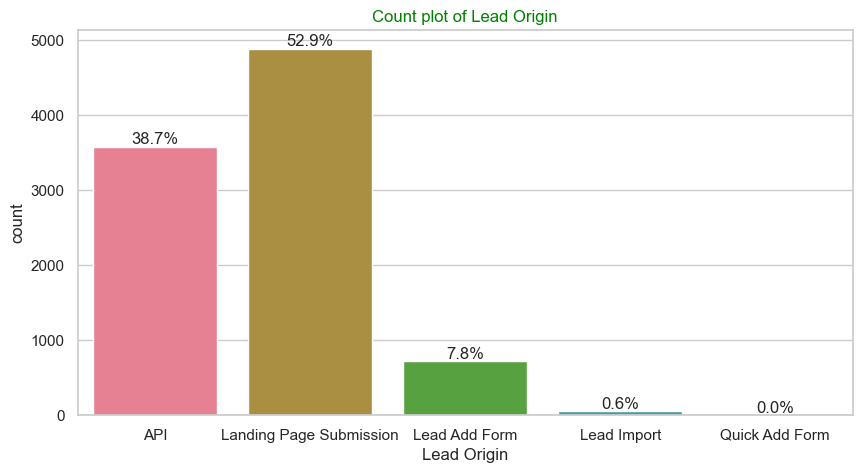

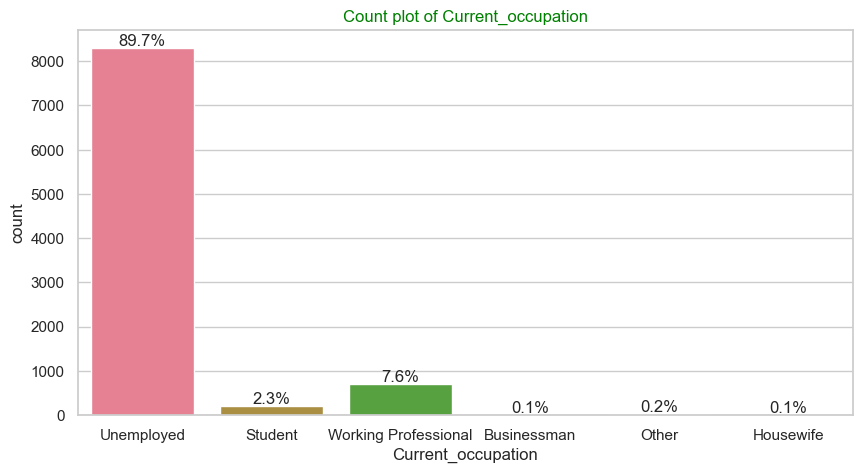

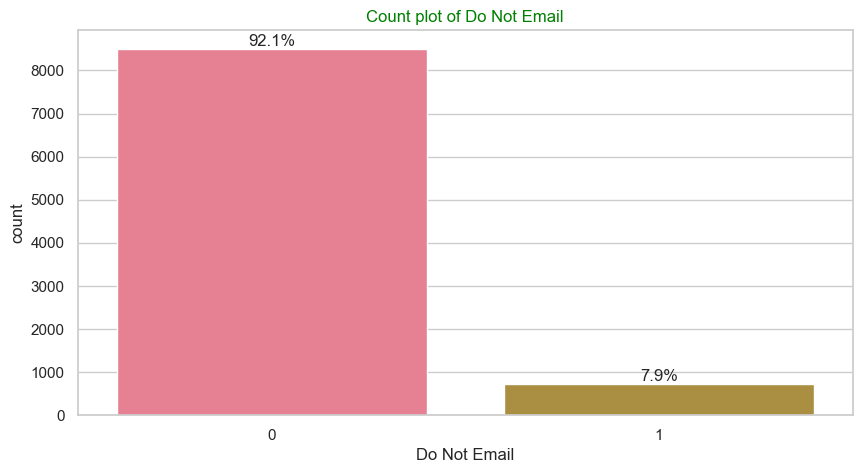

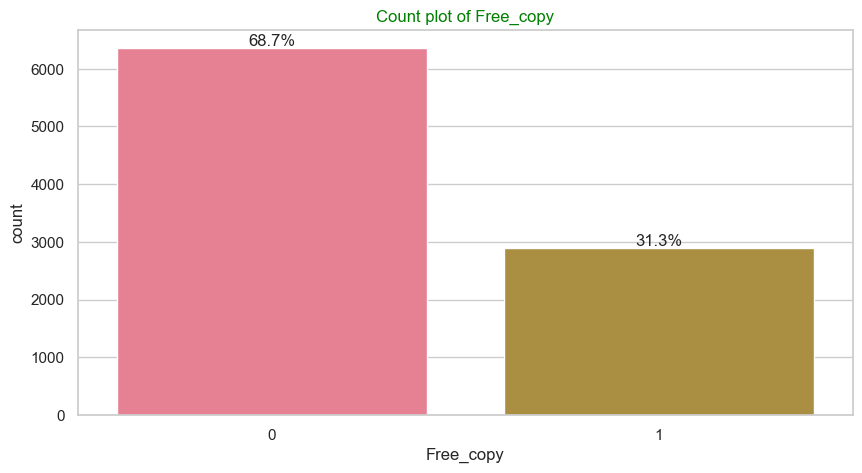

In [51]:
for i in cat_cols[:4]:
    plt.figure(figsize=[10, 5])
    plt.title("Count plot of {}".format(i), color="green")
    ax = sns.countplot(x=i, data=df_leads)
    total = len(df_leads[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


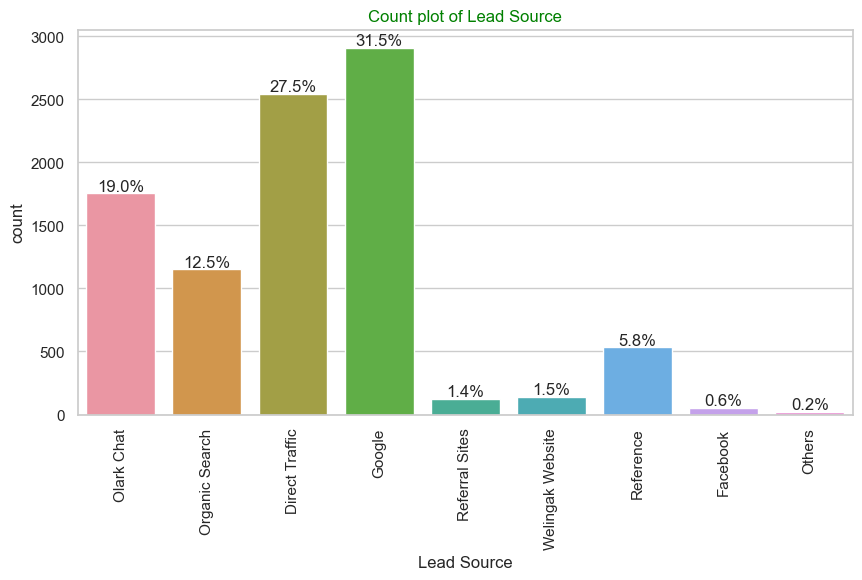

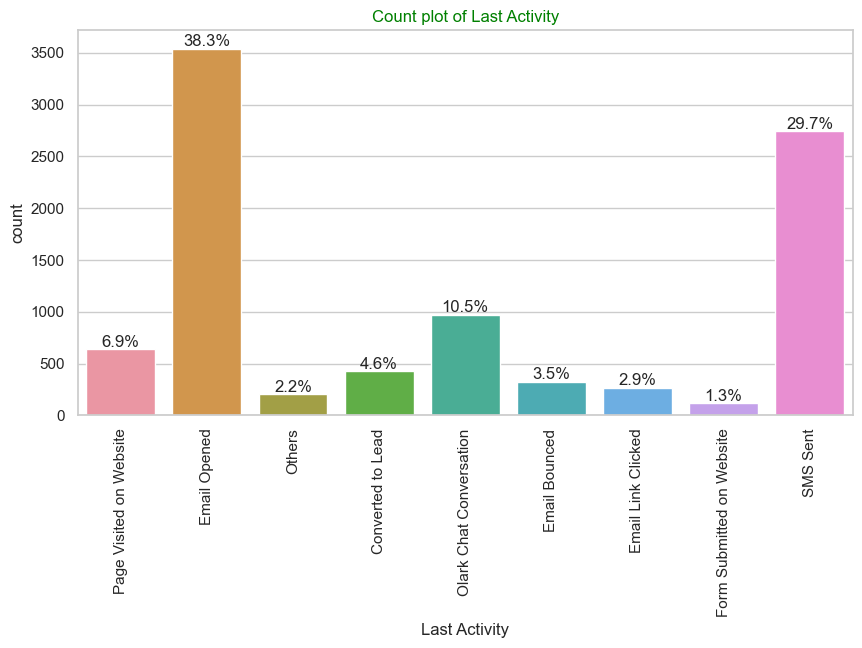

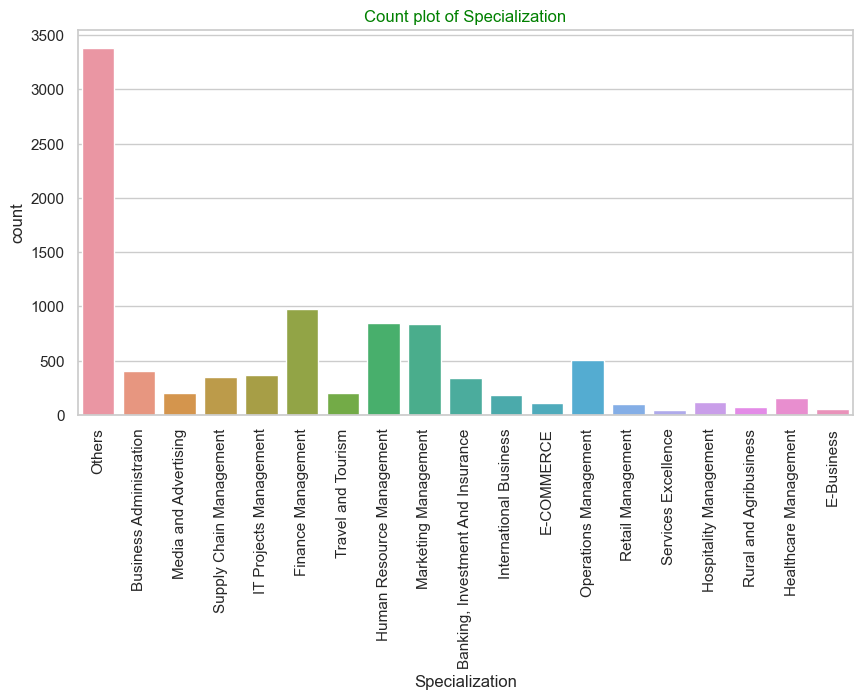

In [52]:
for i in cat_cols[4:]:
    plt.figure(figsize=[10, 5])
    plt.title("Count plot of {}".format(i), color="green")
    ax = sns.countplot(x=i, data=df_leads)
    total = len(df_leads[i])
    plt.xticks(rotation=90)
    
    if i != "Specialization":  # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    else:
        pass


<strong><span style="color:red">Observations:</span></strong> 

- In Categorical Univariate Analysis we get to know the value counts percentage in each variable that how much is the distribution of values in each column.

- With this we get some understanding that which variables can be used in **Bivariate analysis**.

<hr/>
<strong><span style="color:red">Insights Univariate:</span></strong>  

**Here is the list of features from variables which are present in majority (Converted and Not Converted included)** 

- **Lead Origin:** "Landing Page Submission" identified 53% customers, "API" identified 39%. 

- **Current_occupation:** It has 90% of the customers as Unemployed

- **Do Not Email:** 92% of the people has opted that they dont want to be emailed about the course.

- **Lead Source:** 58% Lead source is from Google & Direct Traffic combined

- **Last Activity:** 68% of customers contribution in SMS Sent & Email Opened activities

<strong><span style="color:red">IMPORTANT NOTE:</span></strong> These insights will be helpful in further Bivariate Analysis.

In [53]:
def Bivariate_cat(df, variable_name, Target="Converted"):
    plt.figure(figsize=(20, 6))
    
    # Create the actual distribution plot
    plt.subplot(1, 2, 1)
    plt.title("Distribution of {}".format(variable_name), color="blue")
    ax1 = sns.countplot(x=variable_name, hue=Target, data=df_leads, palette="prism_r", alpha=0.46)
    total = len(df_leads[variable_name])
    ax1.set(xlabel="", ylabel="Count")
    
    # Annotate the actual distribution plot
    for p in ax1.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        ax1.annotate(text, (p.get_x() + p.get_width() / 2., p.get_height()), ha="center", va="center", xytext=(0, 5), textcoords="offset points")

    # Create the lead conversion rate plot
    plt.subplot(1, 2, 2)
    plt.title("Lead Conversion Rate of {}".format(variable_name), color="green", fontsize=12)
    ax2 = sns.countplot(x=variable_name, hue=Target, data=df, palette="BuGn", alpha=0.85)
    ax2.set(xlabel=variable_name, ylabel="Count")
    
    # Annotate the lead conversion rate plot
    for bars in ax2.containers:
        total = sum(p.get_height() for p in bars)
        for p in bars:
            percentage = f'{(100 * p.get_height() / total):.1f}%'
            ax2.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), size=11, ha="center", va="bottom")

    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name), color="Brown", fontsize=18)
    plt.xticks(rotation=90)
    plt.legend(["No", "Yes"], title="Converted")


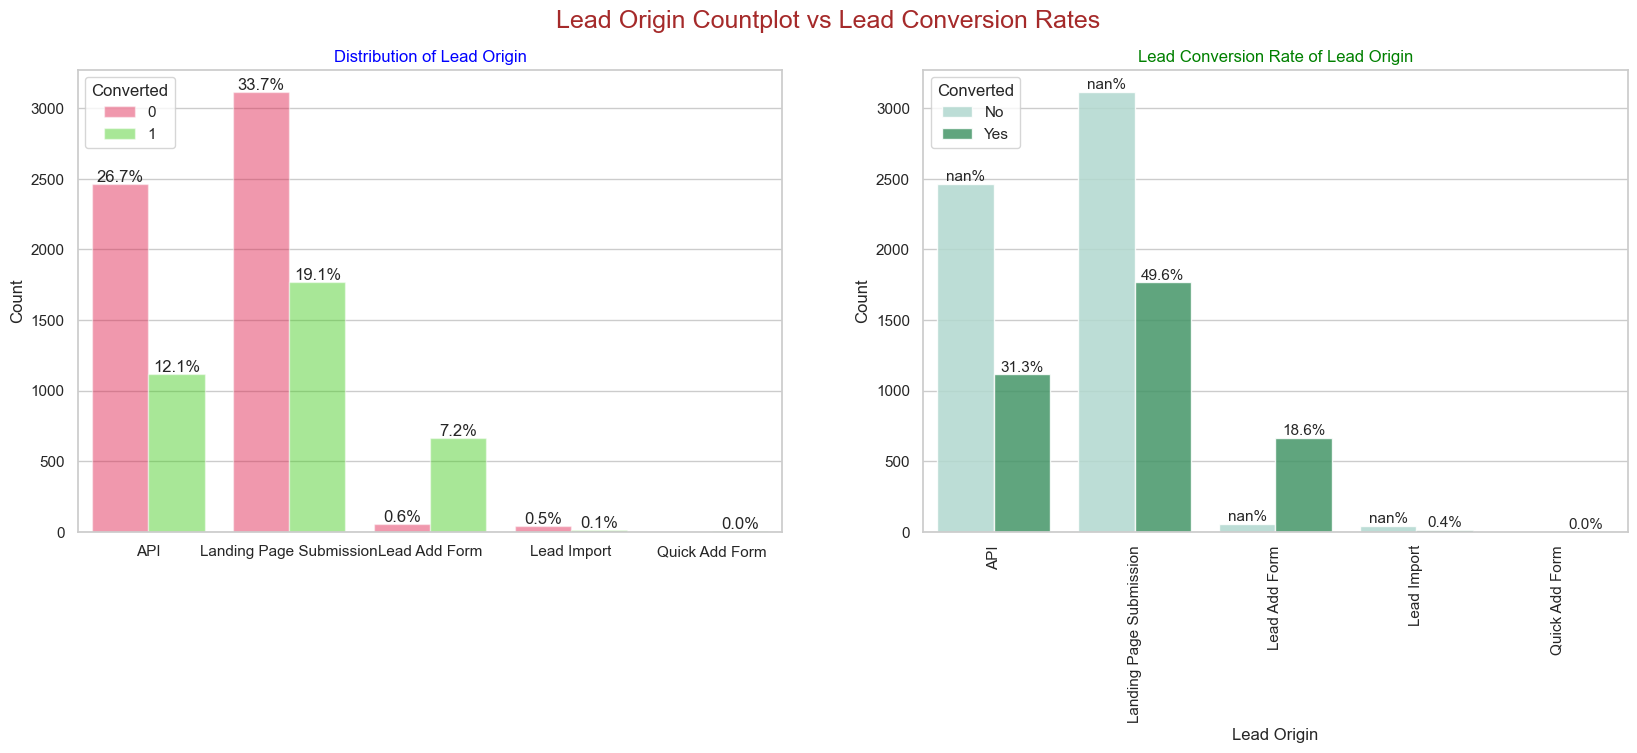

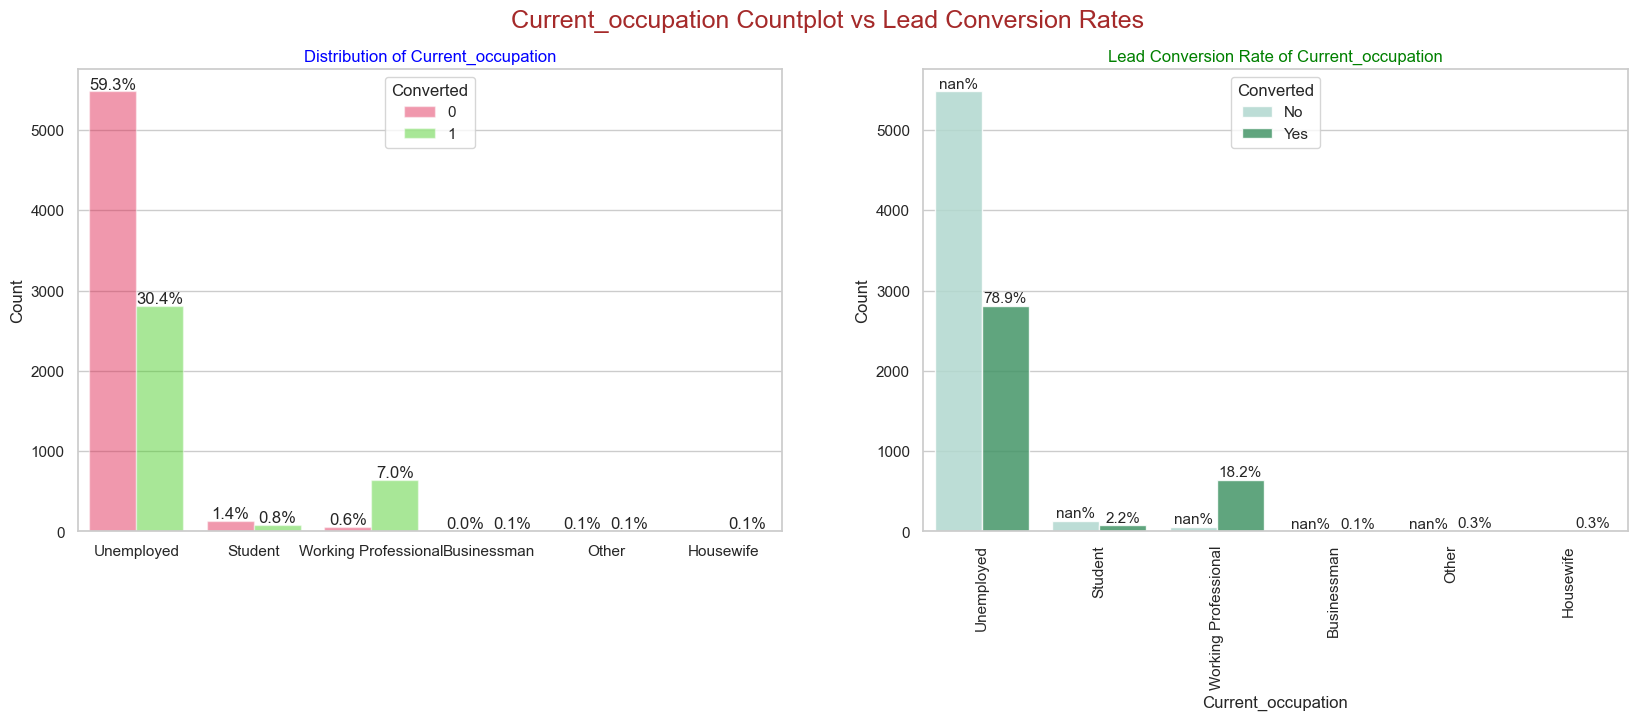

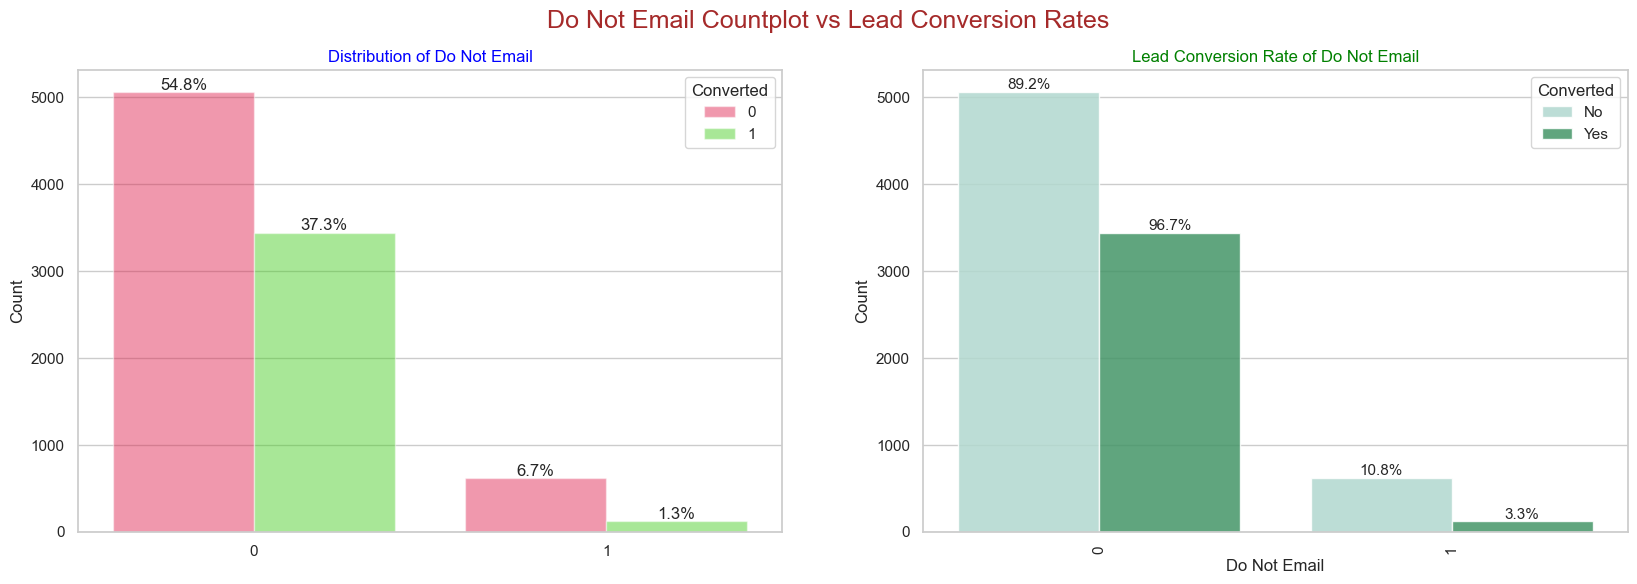

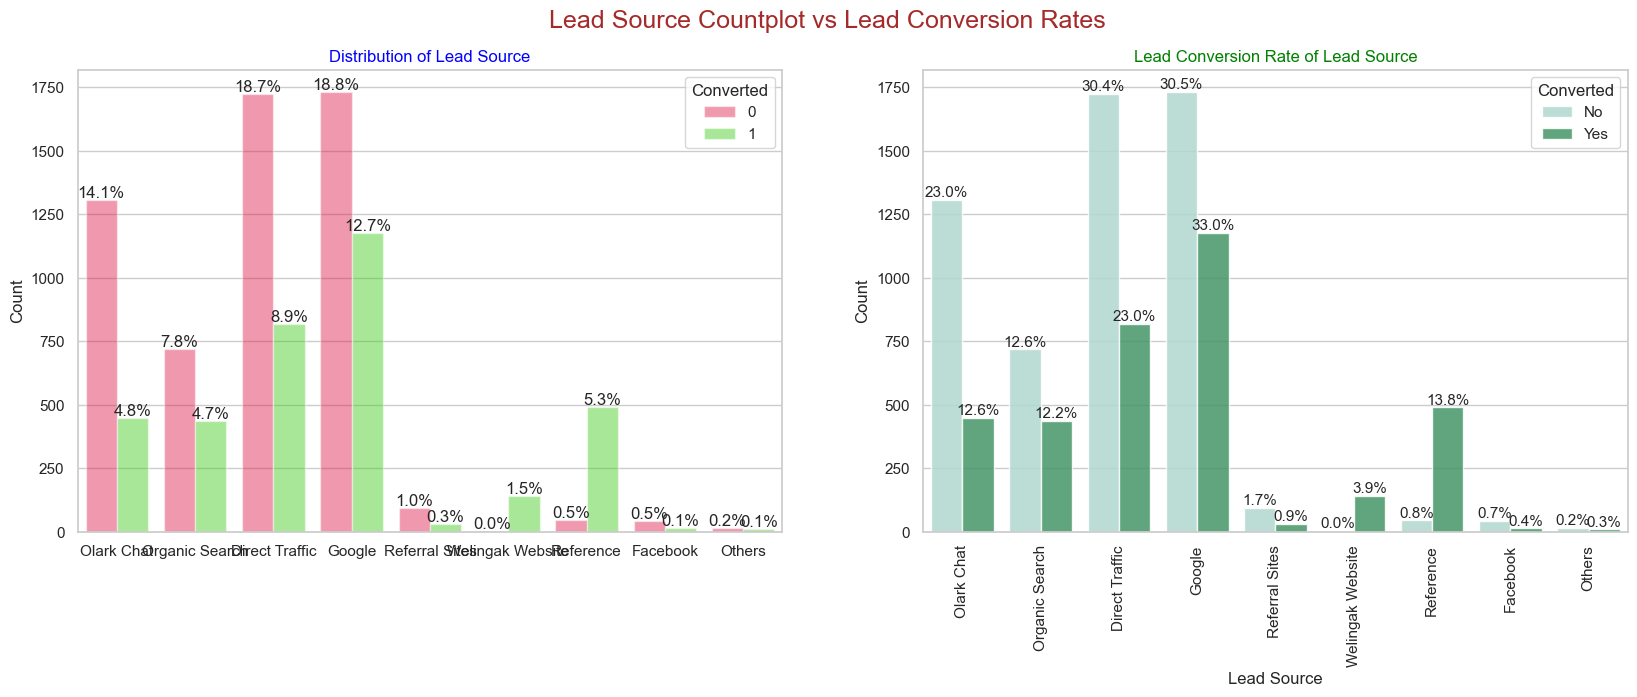

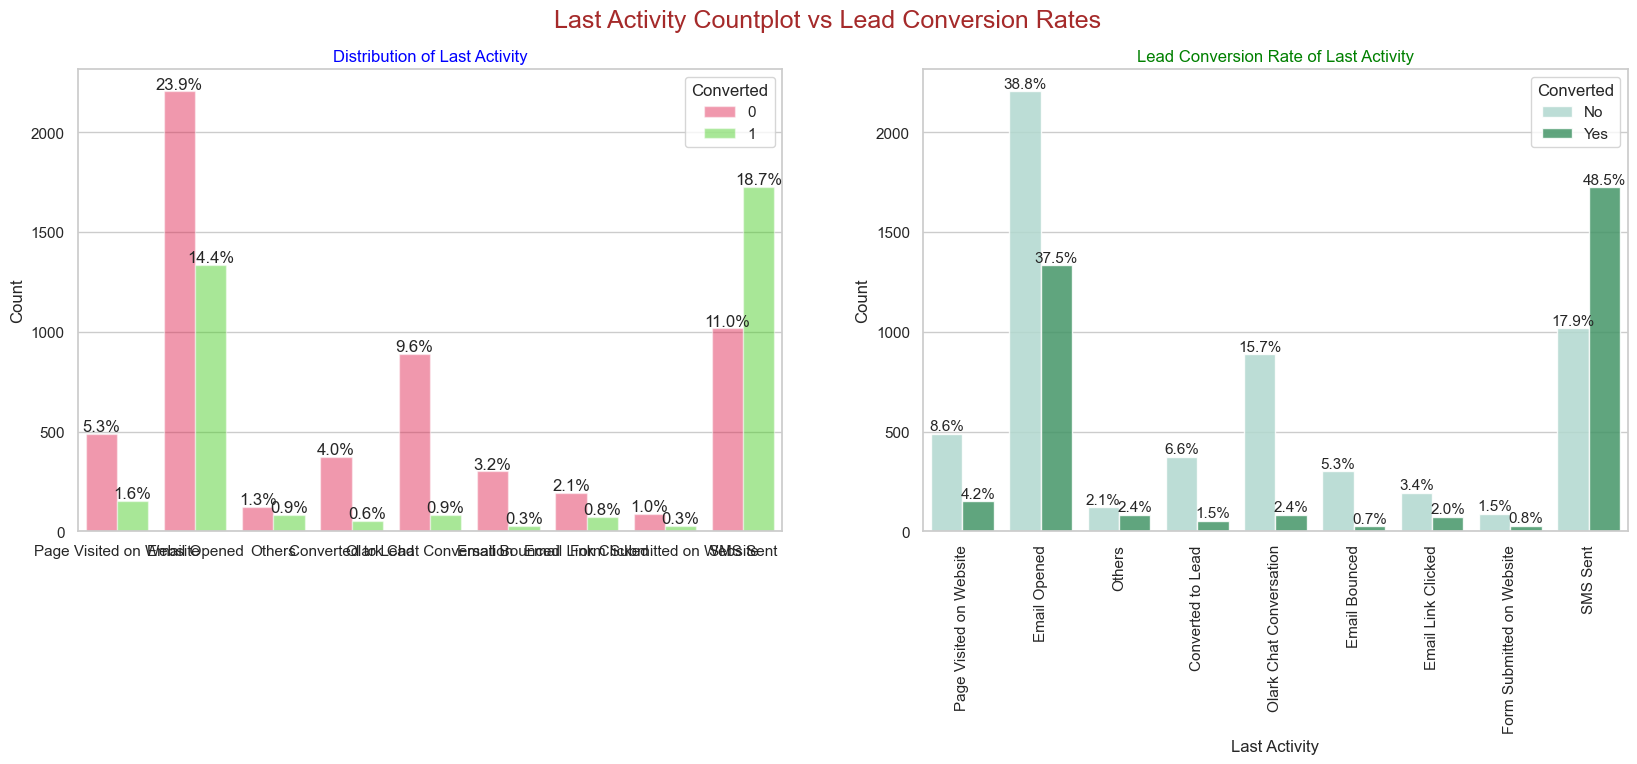

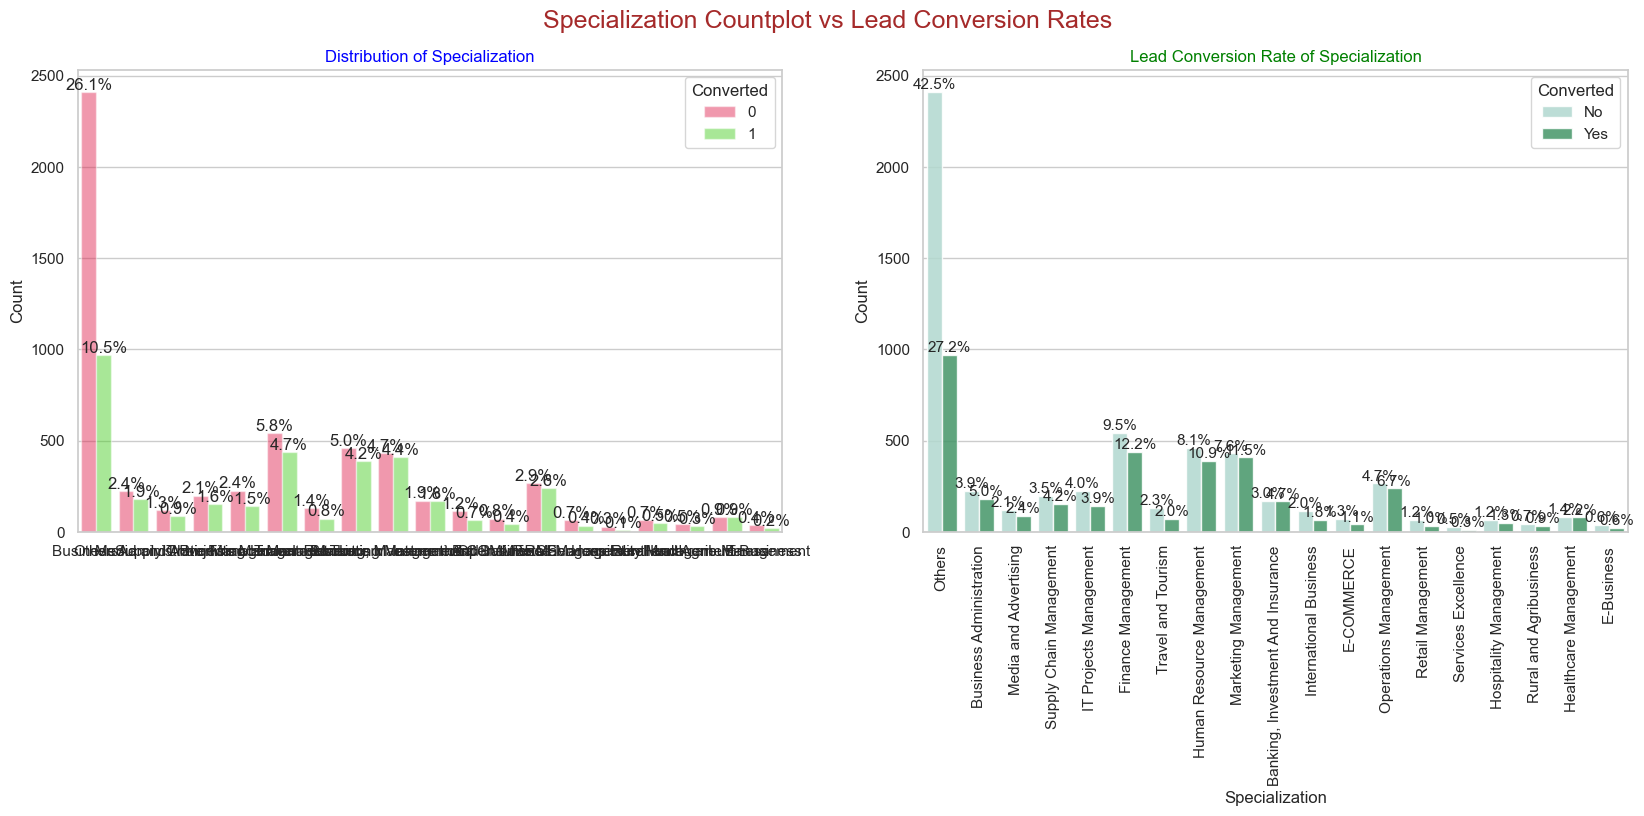

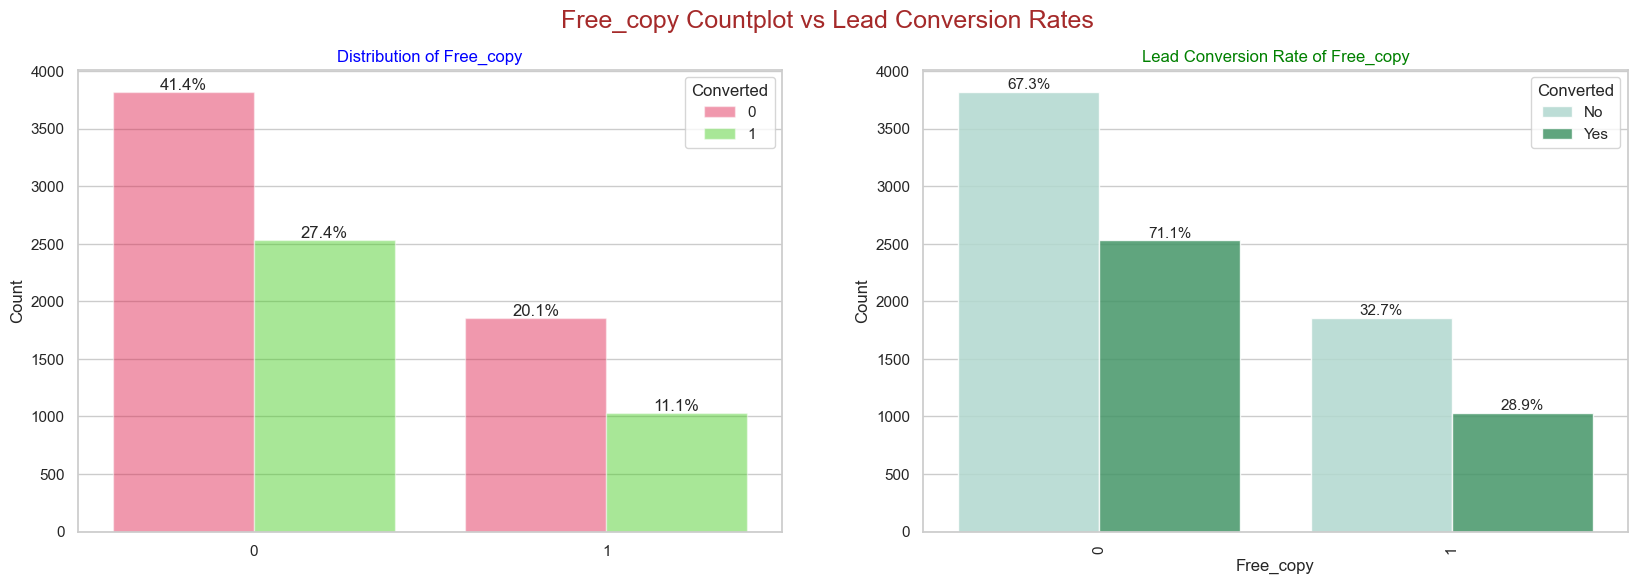

In [54]:
# Bivariate Analysis for categorical variables
categorical_columns = ["Lead Origin", "Current_occupation", "Do Not Email", "Lead Source", "Last Activity", "Specialization", "Free_copy"]

for column in categorical_columns:
    Bivariate_cat(df_leads, variable_name=column)

<strong><span style="color:red">Insights:</span></strong>

- Lead Origin: Approximately 52% of all leads originated from "Landing Page Submission" with a lead conversion rate (LCR) of 36%. The "API" identified around 39% of customers with a **lead conversion rate (LCR) of 31%.
- Current_occupation: About 90% of the customers are Unemployed with a lead conversion rate (LCR) of 34%, while Working Professionals account for only 7.6% of total customers but have a high LCR of 92%.
- Do Not Email: 92% of the people have opted not to be emailed about the course.

<strong><span style="color:red">Note:</span></strong> We have assumed LCR stands for Lead Conversion Rate.
- Lead Source: Google has an LCR of 40% from 31% of customers, Direct Traffic contributes 32% LCR with 27% of customers, and Organic Search also provides a 37.8% LCR with only 12.5% of customers. Reference has the highest LCR of 91%, but only around 6% of customers come through this Lead Source.
- Last Activity: 'SMS Sent' has a high lead conversion rate of 63% with 30% contribution from the last activities, while 'Email Opened' activities are performed by 38% of customers with a 37% lead conversion rate.

<strong><span style="color:red">Specialization:</span></strong> Marketing Management, HR Management, and Finance Management show significant contributions to lead conversion.

<Figure size 1600x400 with 0 Axes>

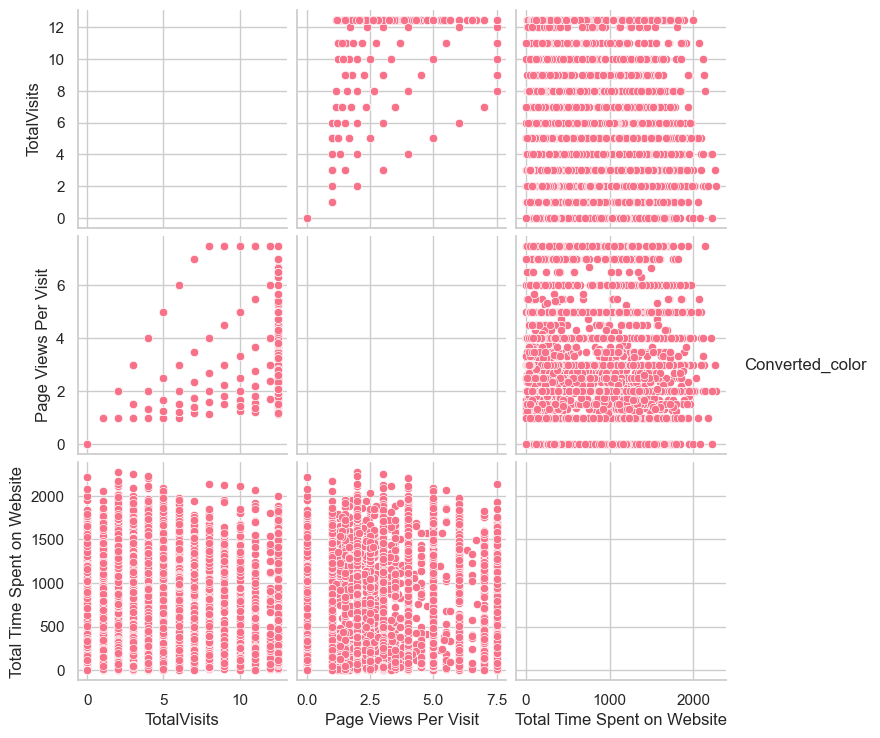

In [55]:
# Create a custom color mapping for the 'Converted' variable
custom_colors = {'No': 'red', 'Yes': 'green'}
df_leads['Converted_color'] = df_leads['Converted'].map(custom_colors)

plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads, vars=num_cols, hue='Converted_color')
plt.show()

df_leads.drop('Converted_color', axis=1, inplace=True)

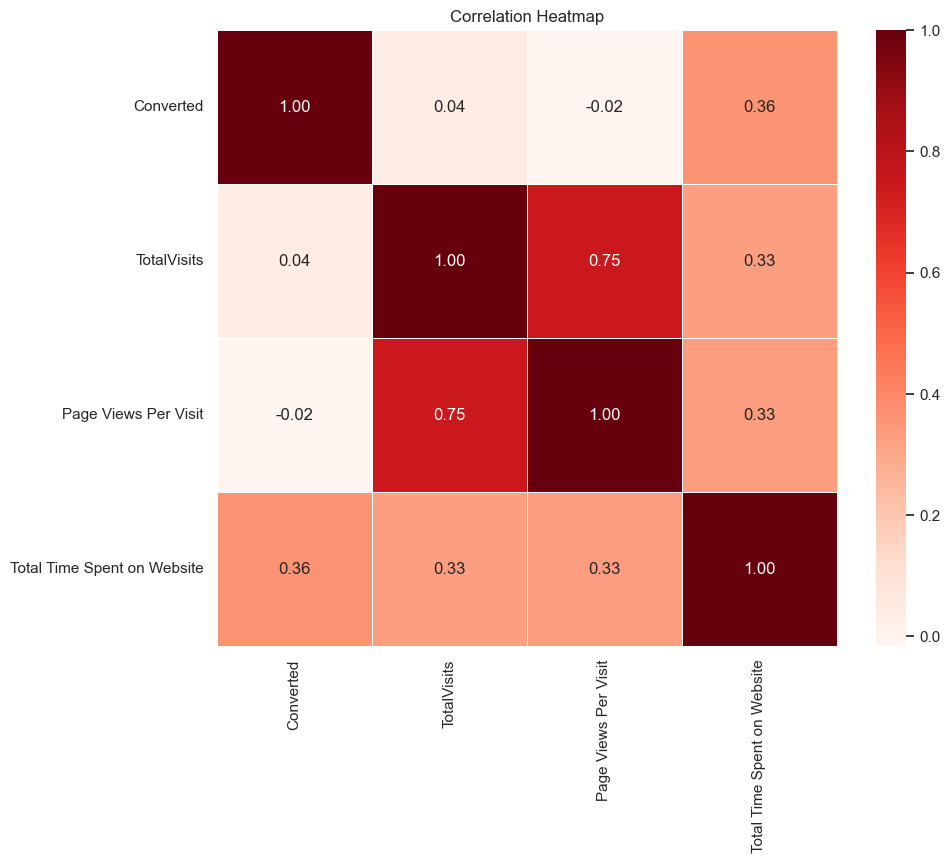

In [56]:
num_cols = ['Converted', 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
correlation = df_leads[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap="Reds", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

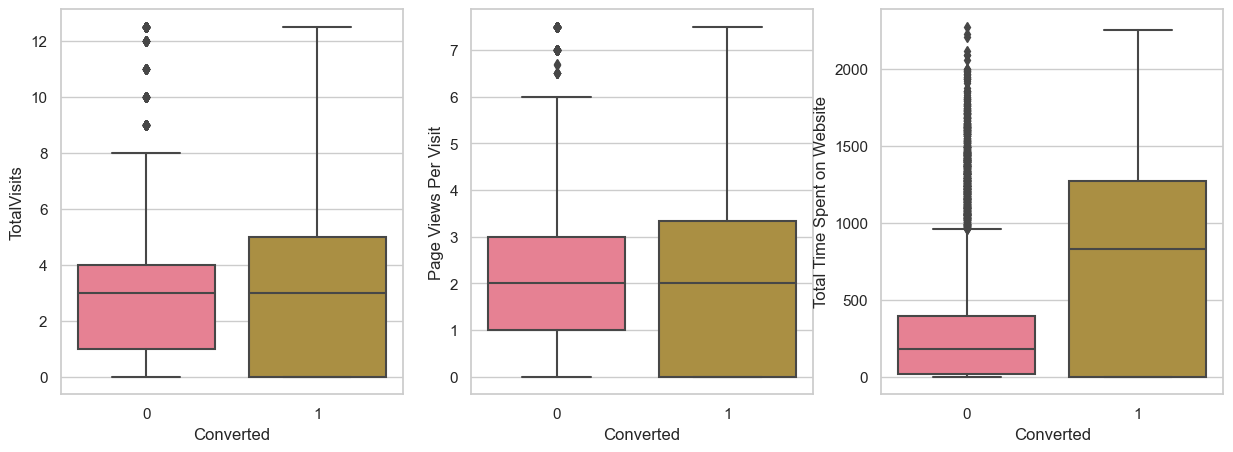

In [57]:
num_cols = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(x='Converted', y=col, data=df_leads, ax=axes[i])

plt.show()

<strong><span style="color:red">Insights:</span></strong> 

The boxplot analysis reveals that past leads who spend more time on the website are more likely to be successfully converted compared to those who spend less time. This suggests a positive correlation between the time spent on the website and lead conversion rates.

### 5.1 Generating One-Hot Encoded Features for Multi-Level Categorical Variables
We have already mapped binary-level categorical columns to 1/0 in previous steps, so now let's proceed with creating dummy variables for multi-level categorical columns.

In [58]:
# Creating dummy variables for selected categorical columns and dropping the first one
dummy_cols = ["Lead Origin", "Lead Source", "Last Activity", "Specialization", "Current_occupation"]
dummy = pd.get_dummies(df_leads[dummy_cols], drop_first=True)

# Adding the dummy variables to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [59]:
# Dropping the original columns for which dummy variables were created
df_leads = df_leads.drop(["Lead Origin", "Lead Source", "Last Activity", "Specialization", "Current_occupation"], axis=1)

In [60]:
df_leads.shape

(9240, 49)

In [61]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

## <strong><span style="color:red">Step 6: Test-Train Split </span></strong>

In [62]:
X = df_leads.drop('Converted', axis=1)
y = df_leads["Converted"]
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [63]:
print("X_train:", X_train.shape, "\ny_train:", y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [64]:
print("X_test:", X_test.shape, "\ny_test:", y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


## <strong><span style="color:red">Step 7: Feature Scaling </span></strong>

In [65]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [66]:
# X-train dataframe after standard scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871       -0.2916      -1.0650                      -0.8854   
6795       -0.2916       0.2624                       0.0057   
3516       -0.2916       0.5942                      -0.6914   
8105       -0.2916       0.5942                       1.3652   
3934       -0.2916      -1.0650                      -0.8854   

      Page Views Per Visit  Free_copy  Lead Origin_Landing Page Submission  \
1871               -1.1849    -0.6732                                    0   
6795               -0.4887     1.4855                                    1   
3516                0.1237    -0.6732                                    0   
8105                1.4323    -0.6732                                    1   
3934               -1.1849    -0.6732                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           0                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1871                       1                           0                   0   
6795                       0                           0                   0   
3516                       1                           0                   0   
8105                       0                           0                   0   
3934                       1                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
1871                      0                           0   
6795                      0                           0   
3516                      0                           0   
8105                      0                           0   
3934                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
1871                             0                            0   
6795                             0                            0   
3516                             0                            0   
8105                             0                            0   
3934                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1871                                 0                           1   
6795                                 0                           1   
3516                                 0                           1   
8105                                 0                           0   
3934                                 0                           1   

      Last Activity_Form Submitted on Website  \
1871                                        0   
6795                                        0   
3516                                        0   
8105                                        0   
3934                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1871                                      0                     0   
6795                                      0                     0   
3516                                      0                     0   
8105                                      0                     0   
3934                  

In [67]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

### 7.1 : Looking at Correlations
- Feature elimination based on correlations

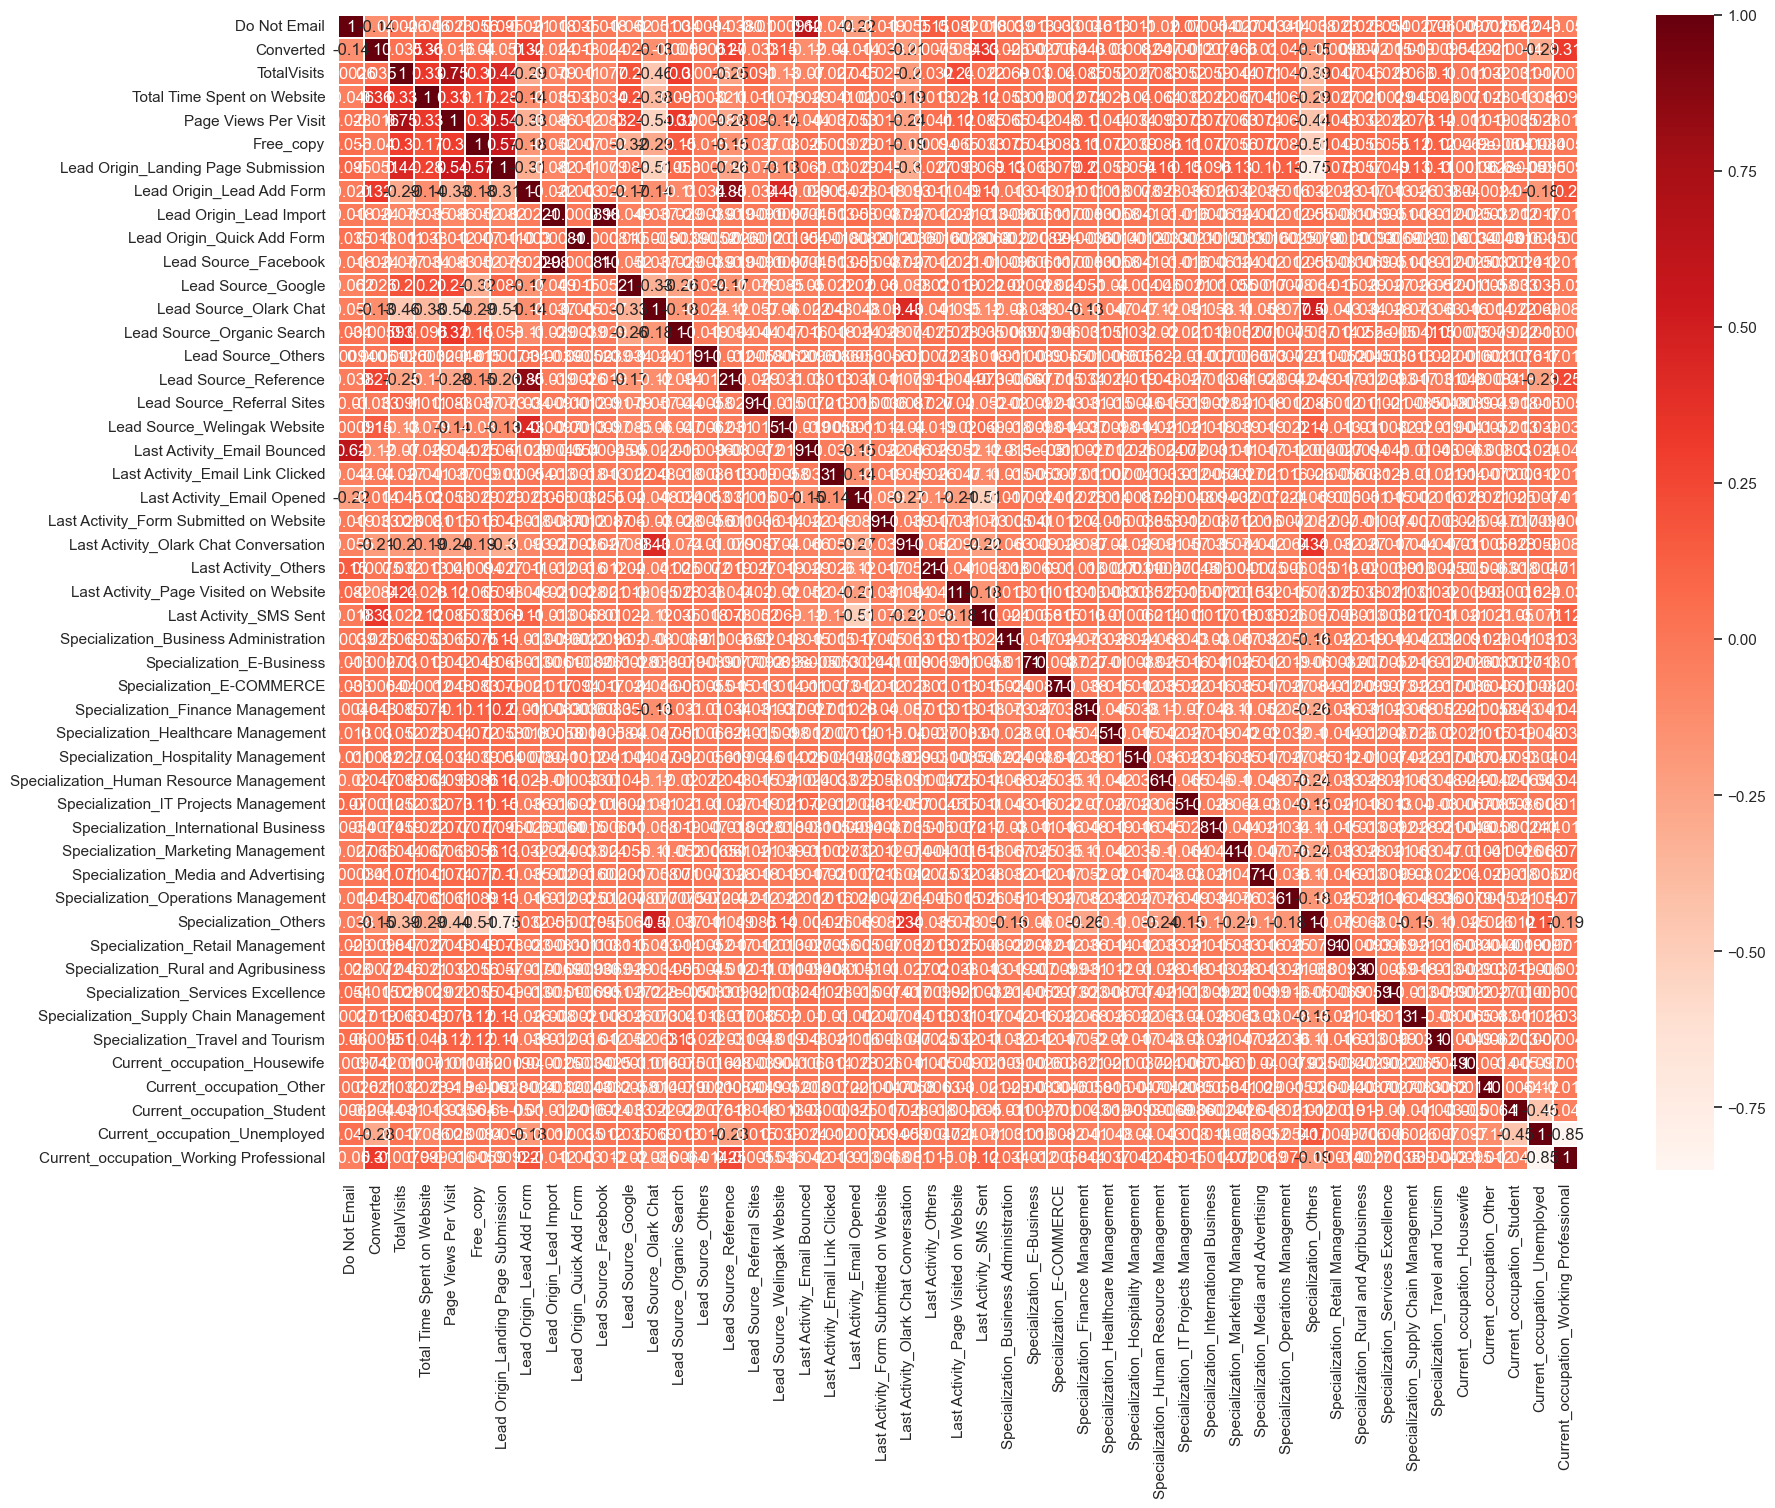

In [68]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="Reds",annot=True)
plt.show()

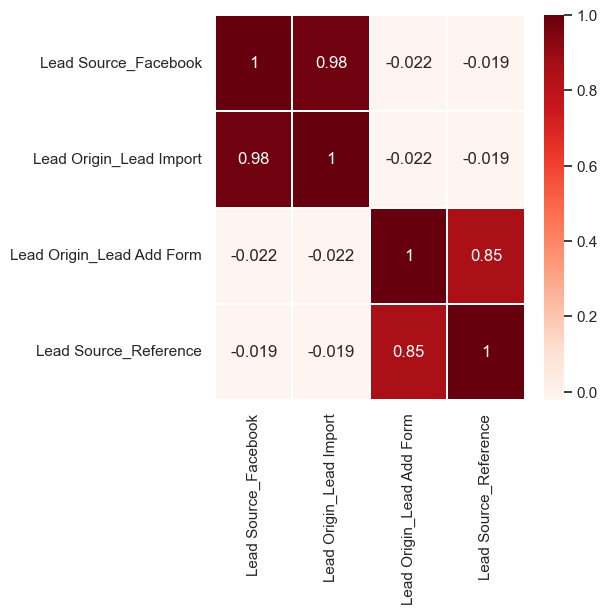

In [69]:
# as the above heatmap has so many columns lets breakdown suspected variables which migh have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))        
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Reds",annot=True)
plt.show()

<strong><span style="color:Red">Note:</span></strong> It is advisable to eliminate one of the variables in highly correlated pairs (correlation coefficients near 0.98 and 0.85). This will not significantly contribute to the model's performance. Therefore, it is recommended to drop either 'Lead Origin_Lead Import' or 'Lead Origin_Lead Add Form'.






In [70]:
columns_to_drop = ['Lead Origin_Lead Import', 'Lead Origin_Lead Add Form']
X_test = X_test.drop(columns_to_drop, axis=1)
X_train = X_train.drop(columns_to_drop, axis=1)

<strong><span style="color:Red">Step 8: Model Building</span></strong>
In this step, we will construct a Logistic Regression model for the prediction of the categorical variable. The process involves:

- Feature Selection Using RFE (Coarse Tuning).
- Manual Fine-Tuning Using p-Values and VIFs for a more refined model.


### 8.1 Feature Selection Using RFE (Recursive Feature Elimination)
In this section, we will perform feature selection using Recursive Feature Elimination (RFE). RFE is a method for selecting the most relevant features for our model. This is an essential step in building an effective Logistic Regression model.

In [74]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15).fit(X_train, y_train)

In [76]:
result = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
result

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 

In [78]:
top15 = pd.DataFrame()
top15['features'] = X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking'] = rfe.ranking_
top15 = top15.sort_values(by='Ranking')
top15

features  Feature Chosen  Ranking
22                    Last Activity_SMS Sent            True        1
41              Current_occupation_Housewife            True        1
35                     Specialization_Others            True        1
28     Specialization_Hospitality Management            True        1
20                      Last Activity_Others            True        1
19     Last Activity_Olark Chat Conversation            True        1
17                Last Activity_Email Opened            True        1
14              Lead Source_Welingak Website            True        1
12                     Lead Source_Reference            True        1
11                        Lead Source_Others            True        1
45   Current_occupation_Working Professional            True        1
9                     Lead Source_Olark Chat            True        1
7                       Lead Source_Facebook            True        1
5        Lead Origin_Landing Page Submission            True        1
2                Total Time Spent on Website            True        1
44             Current_occupation_Unemployed           False        2
42                  Current_occupation_Other           False        3
43                Current_occupation_Student           False        4
37     Specialization_Rural and Agribusiness           False        5
16          Last Activity_Email Link Clicked           False        6
31     Specialization_International Business           False        7
36          Specialization_Retail Management           False        8
1                                TotalVisits           False        9
3                       Page Views Per Visit           False       10
0                               Do Not Email           False       11
21     Last Activity_Page Visited on Website           False       12
23    Specialization_Business Administration           False       13
15               Last Activity_Email Bounced           False       14
34      Specialization_Operations Management           False       15
29  Specialization_Human Resource Management           False       16
32       Specialization_Marketing Management           False       17
4                                  Free_copy           False       18
6                 Lead Origin_Quick Add Form           False       19
38        Specialization_Services Excellence           False       20
39    Specialization_Supply Chain Management           False       21
8                         Lead Source_Google           False       22
25                 Specialization_E-COMMERCE           False       23
13                Lead Source_Referral Sites           False       24
30     Specialization_IT Projects Management           False       25
27      Specialization_Healthcare Management           False       26
26         Specialization_Finance Management           False       27
10                Lead Source_Organic Search           False       28
18   Last Activity_Form Submitted on Website           False       29
33      Specialization_Media and Advertising           False       30
24                 Specialization_E-Business           False       31
40         Specialization_Travel and Tourism           False       32

In [79]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [82]:
# Get columns not selected by RFE
not_selected_cols = X_train.columns[~rfe.support_]
not_selected_cols

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
      

In [87]:
def get_vif(model_df):
    # Create a DataFrame to store feature names and their corresponding VIFs
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    
    # Calculate VIF for each feature and store it in the DataFrame
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    
    # Round the VIF values to two decimal places for readability
    X['VIF'] = round(X['VIF'], 2)
    
    # Sort the DataFrame by VIF values in descending order
    X = X.sort_values(by='VIF', ascending=False)
    
    # Reset the index for the DataFrame for a clean presentation
    X = X.reset_index(drop=True)
    
    return X


### Model 1

In [89]:
# Define the columns selected by RFE
rfe_col = X_train.columns[rfe.support_]

# Create the X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable (intercept)
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a generalized linear model (GLM)
logm1 = sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial()).fit()

# Get the model parameters
model_params = logm1.params
logm1.params

const                                     -1.0333
Total Time Spent on Website                1.0505
Lead Origin_Landing Page Submission       -1.2721
Lead Source_Facebook                      -0.6961
Lead Source_Olark Chat                     0.9001
Lead Source_Others                         0.9807
Lead Source_Reference                      2.8977
Lead Source_Welingak Website               5.3802
Last Activity_Email Opened                 0.9506
Last Activity_Olark Chat Conversation     -0.5534
Last Activity_Others                       1.2580
Last Activity_SMS Sent                     2.0688
Specialization_Hospitality Management     -1.0720
Specialization_Others                     -1.1937
Current_occupation_Housewife              23.0222
Current_occupation_Working Professional    2.6855
dtype: float64

In [90]:
# Display the summary of the logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Sat, 14 Oct 2023   Deviance:                       5465.5
Time:                        01:02:15   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [91]:
get_vif(X_train_rfe)

Features    VIF
0                     Specialization_Others 2.4800
1       Lead Origin_Landing Page Submission 2.4700
2                Last Activity_Email Opened 2.3900
3                    Last Activity_SMS Sent 2.2100
4                    Lead Source_Olark Chat 2.1600
5     Last Activity_Olark Chat Conversation 1.7200
6                     Lead Source_Reference 1.3200
7               Total Time Spent on Website 1.2500
8   Current_occupation_Working Professional 1.2100
9              Lead Source_Welingak Website 1.0900
10                     Last Activity_Others 1.0800
11                     Lead Source_Facebook 1.0300
12    Specialization_Hospitality Management 1.0200
13             Current_occupation_Housewife 1.0100
14                       Lead Source_Others 1.0000

<strong><span style="color:Red">IMPORTANT NOTE:</span></strong> p-values for all variables is less than 0.05

Note that 'Current_occupation_Housewife' is excluded from the model due to its high p-value of 0.999, exceeding the 0.05 threshold for statistical significance.

### Model 2

In [92]:
# Remove the 'Current_occupation_Housewife' column from the list of selected columns.
rfe_col = rfe_col.drop("Current_occupation_Housewife")

In [94]:
# Create the X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable (intercept)
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model using generalized linear model (GLM)
logm2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial()).fit()

# Get the model parameters
model_params2 = logm2.params
model_params2

const                                     -1.0251
Total Time Spent on Website                1.0494
Lead Origin_Landing Page Submission       -1.2674
Lead Source_Facebook                      -0.6969
Lead Source_Olark Chat                     0.8991
Lead Source_Others                         0.9739
Lead Source_Reference                      2.9171
Lead Source_Welingak Website               5.3791
Last Activity_Email Opened                 0.9490
Last Activity_Olark Chat Conversation     -0.5583
Last Activity_Others                       1.2482
Last Activity_SMS Sent                     2.0588
Specialization_Hospitality Management     -1.0795
Specialization_Others                     -1.1978
Current_occupation_Working Professional    2.6773
dtype: float64

In [95]:
# Display the summary of the logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Sat, 14 Oct 2023   Deviance:                       5480.7
Time:                        01:07:25   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [96]:
get_vif(X_train_rfe)

Features    VIF
0                     Specialization_Others 2.4800
1       Lead Origin_Landing Page Submission 2.4700
2                Last Activity_Email Opened 2.3900
3                    Last Activity_SMS Sent 2.2100
4                    Lead Source_Olark Chat 2.1600
5     Last Activity_Olark Chat Conversation 1.7200
6                     Lead Source_Reference 1.3100
7               Total Time Spent on Website 1.2500
8   Current_occupation_Working Professional 1.2100
9              Lead Source_Welingak Website 1.0900
10                     Last Activity_Others 1.0800
11                     Lead Source_Facebook 1.0300
12    Specialization_Hospitality Management 1.0200
13                       Lead Source_Others 1.0000

<strong><span style="color:Red">IMPORTANT NOTE:</span></strong> 'Lead Source_Facebook' is removed from the model due to its high p-value of 0.187, exceeding the 0.05 threshold for statistical significance.

### Model 3

In [97]:
# Remove the 'Lead Source_Facebook' column from the list of selected columns.
rfe_col = rfe_col.drop("Lead Source_Facebook")

In [99]:
# Create the X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable (intercept)
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model using generalized linear model (GLM)
logm3 = sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial()).fit()

# Get the model parameters
model_params3 = logm3.params
model_params3

const                                     -1.0405
Total Time Spent on Website                1.0518
Lead Origin_Landing Page Submission       -1.2493
Lead Source_Olark Chat                     0.9169
Lead Source_Others                         0.9814
Lead Source_Reference                      2.9372
Lead Source_Welingak Website               5.3967
Last Activity_Email Opened                 0.9434
Last Activity_Olark Chat Conversation     -0.5582
Last Activity_Others                       1.2487
Last Activity_SMS Sent                     2.0555
Specialization_Hospitality Management     -1.0904
Specialization_Others                     -1.1943
Current_occupation_Working Professional    2.6757
dtype: float64

In [100]:
# Display the summary of the logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Sat, 14 Oct 2023   Deviance:                       5482.6
Time:                        01:09:59   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [101]:
get_vif(X_train_rfe)

Features    VIF
0                     Specialization_Others 2.4700
1       Lead Origin_Landing Page Submission 2.4600
2                Last Activity_Email Opened 2.3600
3                    Last Activity_SMS Sent 2.2000
4                    Lead Source_Olark Chat 2.1400
5     Last Activity_Olark Chat Conversation 1.7200
6                     Lead Source_Reference 1.3100
7               Total Time Spent on Website 1.2400
8   Current_occupation_Working Professional 1.2100
9              Lead Source_Welingak Website 1.0800
10                     Last Activity_Others 1.0800
11    Specialization_Hospitality Management 1.0200
12                       Lead Source_Others 1.0000

<strong><span style="color:Red">IMPORTANT NOTE:</span></strong> 'Lead Source_Others' is removed from the model due to its high p-value of 0.055, exceeding the 0.05 threshold for statistical significance."

### Model 4

In [102]:
# Remove the 'Lead Source_Others' column from the list of selected columns.
rfe_col = rfe_col.drop("Lead Source_Others")

In [103]:
# Create the X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable (intercept)
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model using generalized linear model (GLM)
logm4 = sm.GLM(y_train, X_train_sm4, family=sm.families.Binomial()).fit()

# Get the model parameters
model_params4 = logm4.params
model_params4

const                                     -1.0236
Total Time Spent on Website                1.0498
Lead Origin_Landing Page Submission       -1.2590
Lead Source_Olark Chat                     0.9072
Lead Source_Reference                      2.9253
Lead Source_Welingak Website               5.3887
Last Activity_Email Opened                 0.9421
Last Activity_Olark Chat Conversation     -0.5556
Last Activity_Others                       1.2531
Last Activity_SMS Sent                     2.0519
Specialization_Hospitality Management     -1.0944
Specialization_Others                     -1.2033
Current_occupation_Working Professional    2.6697
dtype: float64

In [104]:
# Display the summary of the logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Sat, 14 Oct 2023   Deviance:                       5486.1
Time:                        01:12:24   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [105]:
get_vif(X_train_rfe)

Features    VIF
0                     Specialization_Others 2.4700
1       Lead Origin_Landing Page Submission 2.4500
2                Last Activity_Email Opened 2.3600
3                    Last Activity_SMS Sent 2.2000
4                    Lead Source_Olark Chat 2.1400
5     Last Activity_Olark Chat Conversation 1.7200
6                     Lead Source_Reference 1.3100
7               Total Time Spent on Website 1.2400
8   Current_occupation_Working Professional 1.2100
9              Lead Source_Welingak Website 1.0800
10                     Last Activity_Others 1.0800
11    Specialization_Hospitality Management 1.0200

<strong><span style="color:Red">IMPORTANT NOTE:</span></strong> Model 4 is confirmed to be stable and all included variables exhibit significant p-values below the threshold (p-values < 0.05). As a result, Model 4 will be utilized for further analysis.

## <strong><span style="color:red">Step 9: Model Evaluation</span></strong>

### Confusion Matrix
- Evaluate the model's performance using a confusion matrix.

### Accuracy
- Calculate the model's accuracy to assess its overall correctness.

### Sensitivity and Specificity
- Determine the model's sensitivity (True Positive Rate) and specificity (True Negative Rate) to evaluate its ability to correctly identify positive and negative cases.

### Threshold Determination using ROC & Finding Optimal Cutoff Point
- Utilize the Receiver Operating Characteristic (ROC) curve to find the optimal cutoff point for the model, which balances sensitivity and specificity.

### Precision and Recall
- Calculate the precision (Positive Predictive Value) and recall (True Positive Rate) to measure the model's ability to provide accurate positive predictions.



In [108]:
# Get the predicted probabilities of getting 1
y_train_pred = logm4.predict(X_train_sm4)

# Display the first 10 predicted values
y_train_pred[:10]

1871   0.4741
6795   0.0733
3516   0.2491
8105   0.7690
3934   0.2130
4844   0.9878
3297   0.1085
8071   0.9961
987    0.1693
7423   0.8696
dtype: float64

In [109]:
# Reshape the predicted values into an array
y_train_pred = y_train_pred.values.reshape(-1)

# Display the first 10 elements of the array
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [110]:
# Create a DataFrame with actual churn flag and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})

# Add 'Prospect ID' from the index of the 'y_train' DataFrame
y_train_pred_final['Prospect ID'] = y_train.index

# Display the first few rows of the DataFrame
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0          0.4741         1871
1          0          0.0733         6795
2          0          0.2491         3516
3          0          0.7690         8105
4          0          0.2130         3934

Now, we'll find the optimal cutoff threshold, starting with the default 0.5 value and adding a 'Predicted' feature based on the probabilities.

In [111]:
# Create a 'Predicted' feature based on the probability threshold of 0.5
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# Display the first few rows of the DataFrame
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0          0.4741         1871          0
1          0          0.0733         6795          0
2          0          0.2491         3516          0
3          0          0.7690         8105          1
4          0          0.2130         3934          0

### 9.1 Confusion Matrix

In [112]:
# Calculate the confusion matrix (Actual / Predicted)
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3588  414]
 [ 846 1620]]


### 9.2 Accuracy

In [113]:
# Sensitivity (True Positive Rate) at threshold 0.5
sensitivity = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])

# Specificity (True Negative Rate) at threshold 0.5
specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])

# Print sensitivity and specificity
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.656934306569343
Specificity (True Negative Rate): 0.896551724137931


In [116]:
FPR = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])
print("False Positive Rate (FPR):", FPR)

PPV = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])
print("Positive Predictive Value (PPV):", PPV)

NPV = confusion[0, 0] / (confusion[0, 0] + confusion[1, 0])
print("Negative Predictive Value (NPV):", NPV)

False Positive Rate (FPR): 0.10344827586206896
Positive Predictive Value (PPV): 0.7964601769911505
Negative Predictive Value (NPV): 0.8092016238159675


### 9.4 Plotting the ROC Curve

The ROC curve serves several essential purposes:

- It visualizes the tradeoff between sensitivity and specificity, highlighting that an increase in sensitivity often results in a decrease in specificity.
- The curve's proximity to the left and top borders of the ROC space indicates the test's accuracy. The closer it is to these borders, the more accurate the test.
- Conversely, if the curve approaches the 45-degree diagonal of the ROC space, it suggests less accuracy in the test's performance.

In [117]:
def draw_roc(actual, probs):
    # Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and AUC score
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    # Create a plot for the ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

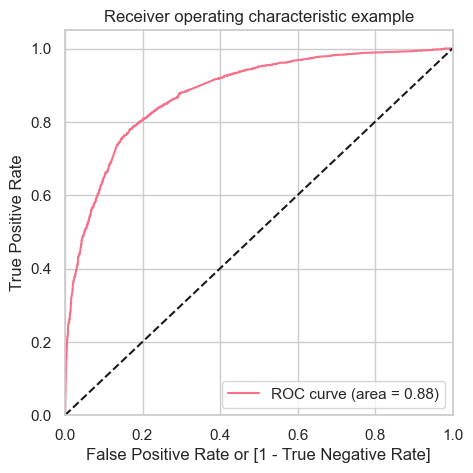

In [119]:
# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate=False)

# Drawing ROC curve for the train set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

<strong><span style="color:Red">IMPORTANT NOTE:</span></strong>An AUC of 0.88 out of 1 indicates a strong predictive model.

### 9.4.1 Finding Optimal Cutoff Point/Probability
The optimal cutoff point or probability is the threshold that provides a balance between sensitivity and specificity in the model.

In [120]:
# Define a list of cutoff values
numbers = [float(x) / 10 for x in range(10)]

# Create columns for different probability cutoffs
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)

# Display the first few rows of the updated DataFrame
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0          0.4741         1871          0    1    1    1    1    1   
1          0          0.0733         6795          0    1    0    0    0    0   
2          0          0.2491         3516          0    1    1    1    0    0   
3          0          0.7690         8105          1    1    1    1    1    1   
4          0          0.2130         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [121]:
# Create a DataFrame to store results for different probability cutoffs
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

# Define a list of cutoff values
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Calculate accuracy, sensitivity, and specificity for each cutoff
for i in num:
    # Calculate the confusion matrix for the current cutoff
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    
    # Calculate accuracy, specificity, and sensitivity
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    
    # Store the results in the DataFrame
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

# Display the results
print(cutoff_df)

         prob  accuracy  sensi  speci
0.0000 0.0000    0.3813 1.0000 0.0000
0.1000 0.1000    0.5957 0.9736 0.3628
0.2000 0.2000    0.7212 0.9201 0.5987
0.3000 0.3000    0.7913 0.8329 0.7656
0.4000 0.4000    0.8137 0.7636 0.8446
0.5000 0.5000    0.8052 0.6569 0.8966
0.6000 0.6000    0.7930 0.5860 0.9205
0.7000 0.7000    0.7791 0.5077 0.9463
0.8000 0.8000    0.7540 0.4055 0.9688
0.9000 0.9000    0.7078 0.2474 0.9915


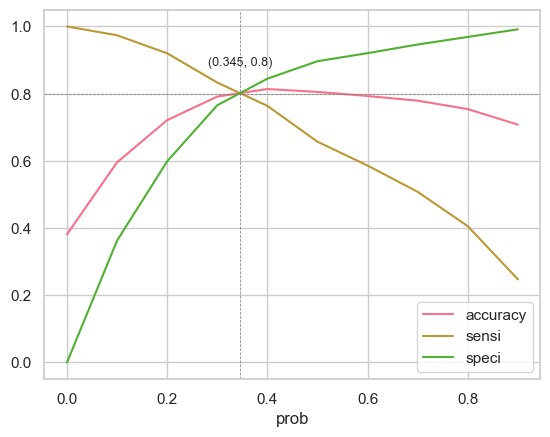

In [122]:
# Import necessary libraries
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Plot accuracy, sensitivity, and specificity curves
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])

# Find the intersection points of sensitivity-accuracy and specificity-accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x: sensi_interp(x) - acc_interp(x), 0.5)), 3)

speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x: speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Add vertical and horizontal lines at the intersection point
plt.axvline(x=intersection_x, color='grey', linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey', linewidth=0.55, linestyle='--')

# Add annotation to display the (x, y) intersection point coordinates 
plt.annotate(f'({intersection_x}, {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0, 20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Display the plot
plt.show()

Approximately at the threshold of 0.345, all the curves intersect, indicating that this value is our optimal cutoff point for the probability threshold.

In [123]:
# Set 'final_predicted' column based on the optimal cutoff point
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)

# Delete unwanted columns from the DataFrame
y_train_pred_final.drop([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, "Predicted"], axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0          0.4741         1871                1
1          0          0.0733         6795                0
2          0          0.2491         3516                0
3          0          0.7690         8105                1
4          0          0.2130         3934                0

### 9.5 Metrics calculation using Train

In [124]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.8045763760049475


In [125]:
def logreg_all_metrics(confusion_matrix):
    TN = confusion_matrix[0, 0]
    TP = confusion_matrix[1, 1]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    
    accuracy = (TN + TP) / (TN + TP + FN + FP)
    sensi = TP / (TP + FN)
    speci = TN / (TN + FP)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    
    # Calculate false positive rate - predicting conversion when customer does not have converted
    FPR = FP / (FP + TN)     
    FNR = FN / (FN + TP)
    
    print("True Negative                    : ", TN)
    print("True Positive                    : ", TP)
    print("False Negative                   : ", FN)
    print("False Positive                    : ", FP) 
    
    print("Model Accuracy                   : ", round(accuracy, 4))
    print("Model Sensitivity                : ", round(sensi, 4))
    print("Model Specificity                : ", round(speci, 4))
    print("Model Precision                  : ", round(precision, 4))
    print("Model Recall                     : ", round(recall, 4))
    print("Model True Positive Rate (TPR)   : ", round(TPR, 4))
    print("Model False Positive Rate (FPR)  : ", round(FPR, 4))


In [126]:
# Calculate the confusion matrix for 'y_train_pred_final'
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*" * 50, "\n")

# Print the confusion matrix
print("Confusion Matrix")
print(confusion_matrix, "\n")

print("*" * 50, "\n")

# Using the UDF to calculate all logistic regression metrics
logreg_all_metrics(confusion_matrix)

print("\n")
print("*" * 50, "\n")

************************************************** 

Confusion Matrix
[[3230  772]
 [ 492 1974]] 

************************************************** 

True Negative                    :  3230
True Positive                    :  1974
False Negative                   :  492
False Positive                    :  772
Model Accuracy                   :  0.8046
Model Sensitivity                :  0.8005
Model Specificity                :  0.8071
Model Precision                  :  0.7189
Model Recall                     :  0.8005
Model True Positive Rate (TPR)   :  0.8005
Model False Positive Rate (FPR)  :  0.1929


************************************************** 



### 9.6 Precision and recall tradeoff
Let's evaluate metrics related to Precision-Recall and Specificity-Sensitivity and identify an optimal probability threshold that will help us achieve an 80% conversion rate, as requested by the CEO.

In [128]:
# Calculate precision, recall, and associated thresholds for the precision-recall tradeoff curve
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

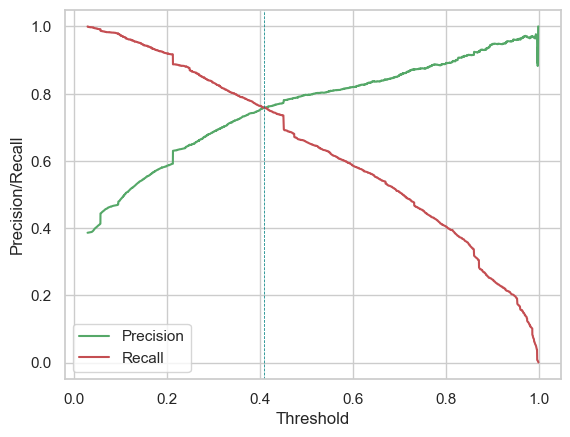

In [129]:
# Plot the precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# Add a vertical line at threshold 0.41
plt.axvline(x=0.41, color='teal', linewidth=0.55, linestyle='--')

# Add legend and axis labels
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

# Show the plot
plt.show()

The intersection point on the curve signifies the threshold value at which the model achieves a harmonious balance between precision and recall. This threshold can be employed to enhance the model's performance in accordance with specific business requirements. In this case, the optimal probability threshold is approximately 0.41, as observed from the curve.

In [130]:
# Copy the DataFrame for testing model evaluation with the precision-recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [131]:
# Assign a feature based on the precision-recall threshold of 0.41
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map(lambda x: 1 if x > 0.41 else 0)

# Display the first few rows of the updated DataFrame
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  \
0          0          0.4741         1871                1   
1          0          0.0733         6795                0   
2          0          0.2491         3516                0   
3          0          0.7690         8105                1   
4          0          0.2130         3934                0   

   precision_recall_prediction  
0                            1  
1                            0  
2                            0  
3                            1  
4                            0

In [132]:
# Calculate the confusion matrix for 'y_train_precision_recall' DataFrame with a precision-recall threshold of 0.41
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*" * 50, "\n")

# Print the confusion matrix
print("Confusion Matrix")
print(confusion_matrix, "\n")

print("*" * 50, "\n")

# Using the UDF to calculate all logistic regression metrics
logreg_all_metrics(confusion_matrix)

print("\n")
print("*" * 50, "\n")

************************************************** 

Confusion Matrix
[[3406  596]
 [ 596 1870]] 

************************************************** 

True Negative                    :  3406
True Positive                    :  1870
False Negative                   :  596
False Positive                    :  596
Model Accuracy                   :  0.8157
Model Sensitivity                :  0.7583
Model Specificity                :  0.8511
Model Precision                  :  0.7583
Model Recall                     :  0.7583
Model True Positive Rate (TPR)   :  0.7583
Model False Positive Rate (FPR)  :  0.1489


************************************************** 



When utilizing a precision-recall threshold of 0.41, we observe that the True Positive Rate, Sensitivity, and Recall values have decreased to approximately 75%. However, our business objective requires this metric to be close to 80%. On the other hand, a Sensitivity-Specificity threshold of 0.345 consistently achieves an 80% metric value. Therefore, we will select the Sensitivity-Specificity view as the optimal cutoff for our final predictions.

### <strong><span style="color:red"> Adding Lead Score Feature to Training dataframe </span></strong> 
- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [133]:
# Add the Lead Score to the DataFrame by rounding the converted probability multiplied by 100
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map(lambda x: round(x * 100))

# Display the first few rows of the updated DataFrame
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0          0.4741         1871                1          47
1          0          0.0733         6795                0           7
2          0          0.2491         3516                0          25
3          0          0.7690         8105                1          77
4          0          0.2130         3934                0          21

## <strong><span style="color:red">Step 10: Making Predictions on test set </span></strong> 